# **APPLIED STATISTICS PROJECT**

## **UNSUPERVISED ANALYSIS**

## Useful libraries and packages

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, adjusted_rand_score, normalized_mutual_info_score, v_measure_score
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage, fcluster, cophenet
from scipy.spatial.distance import pdist
from scipy.stats import mode

from mpl_toolkits.mplot3d import Axes3D

import scanpy as sc
import anndata as ad
from anndata import AnnData
import mudata


from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, v_measure_score, accuracy_score
from sklearn.manifold import MDS

from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, fcluster
from itertools import permutations
from sklearn.metrics import confusion_matrix


## Clustering

### Reduced dataset (ultimo si spera)

In [3]:
# Upload CSV with metadata and pc scores
pca_df = pd.read_csv("/Users/noemibongiorni/Desktop/Università/Applied Statistics/Project/rna_scores_30pcs.csv", index_col=0)

In [4]:
# Check the dataset
pca_df.head()

patient_id            age  cell_type        PC1       PC2       PC3  \
0  SRR16208932  Pediatric_AML     B cell -11.941673  4.346546  0.998468   
1  SRR16208932  Pediatric_AML     B_prog  -5.553754  4.568302 -1.620732   
2  SRR16208932  Pediatric_AML        CLP   4.626499  3.222884 -1.639073   
3  SRR16208932  Pediatric_AML  Early GMP  -1.759837  6.098621 -1.379452   
4  SRR16208932  Pediatric_AML  Erythroid  -8.575211  2.042565 -3.060355   

        PC4       PC5       PC6       PC7  ...      PC21       PC22  \
0 -2.427639  2.210926  2.572245 -1.495453  ...  0.460158   0.692598   
1 -0.471580 -0.864127  2.427597  0.813819  ... -0.720072  -0.664382   
2  0.373265 -3.467237  2.125864  3.426461  ...  4.014057 -15.627580   
3  2.790820 -3.916896  1.683125  0.765121  ...  0.359933   0.741603   
4  3.342749  0.942301 -1.462913  7.875761  ... -0.108303   0.343222   

        PC23      PC24      PC25      PC26      PC27      PC28      PC29  \
0  -0.066943 -0.115917  0.206061 -0.472407  0.796603  0.206891 -0.431710   
1   1.463664 -2.573327  0.354794 -0.441758  0.812932 -0.538093 -0.313310   
2 -13.765819 -5.509414  7.331663  7.134823 -4.235648 -1.053140  4.682926   
3   0.977658 -0.324565  0.517452 -0.976356 -0.503475  0.370270  1.100100   
4   0.002711 -0.602981  0.852930 -0.527701  0.616021  0.110478 -0.471771   

       PC30  
0 -0.585791  
1 -0.478668  
2  1.055341  
3  0.156464  
4 -0.008115  

[5 rows x 33 columns]

In [5]:
pca_df.columns

Index(['patient_id', 'age', 'cell_type', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5',
       'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14',
       'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23',
       'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30'],
      dtype='object')

## Clustering implementation

Processing cell type: B cell


/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2884569544.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


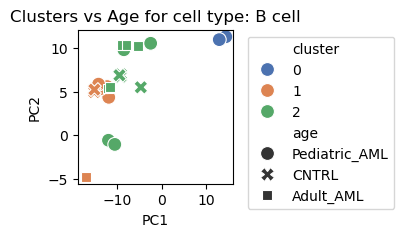

  Accuracy (cluster to label mapping): 0.478
------------------------------------------------------------
Processing cell type: B_prog


/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2884569544.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


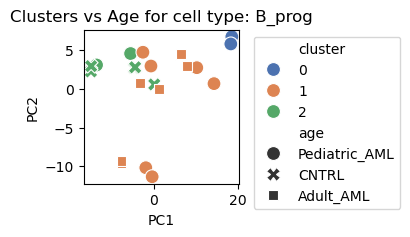

  Accuracy (cluster to label mapping): 0.652
------------------------------------------------------------
Processing cell type: CLP


/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2884569544.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


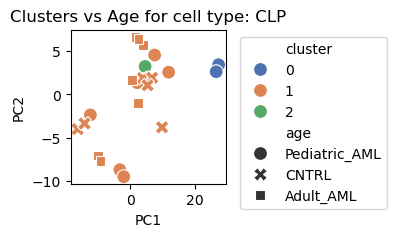

  Accuracy (cluster to label mapping): 0.435
------------------------------------------------------------
Processing cell type: Dendritic cell


/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2884569544.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


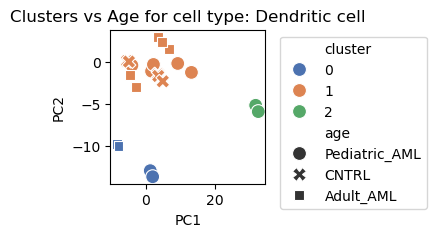

/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2884569544.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


  Accuracy (cluster to label mapping): 0.455
------------------------------------------------------------
Processing cell type: Early GMP


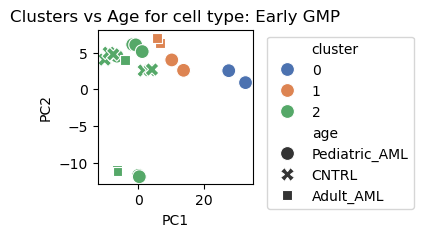

  Accuracy (cluster to label mapping): 0.478
------------------------------------------------------------
Processing cell type: Erythroid


/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2884569544.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


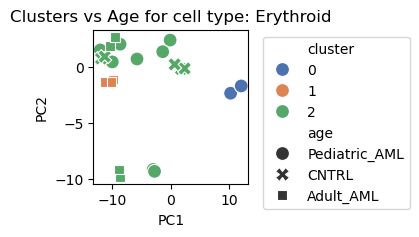

  Accuracy (cluster to label mapping): 0.565
------------------------------------------------------------
Processing cell type: GMP


/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2884569544.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


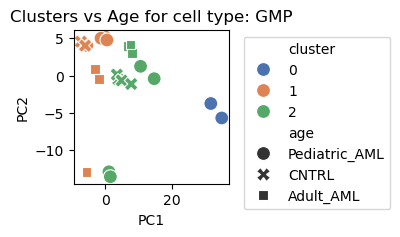

  Accuracy (cluster to label mapping): 0.435
------------------------------------------------------------
Processing cell type: HSC


/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2884569544.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


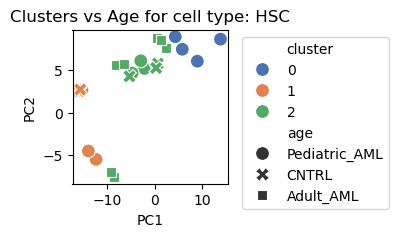

  Accuracy (cluster to label mapping): 0.609
------------------------------------------------------------
Processing cell type: LMPP


/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2884569544.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


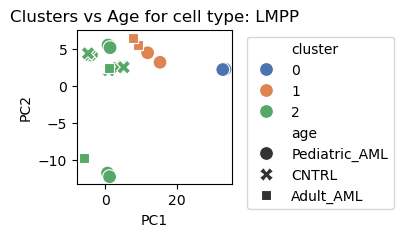

  Accuracy (cluster to label mapping): 0.478
------------------------------------------------------------
Processing cell type: MEP_prog


/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2884569544.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


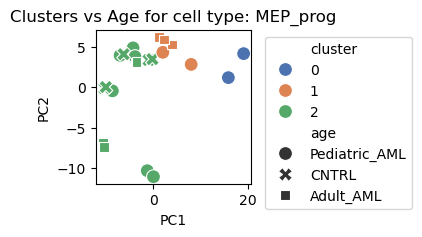

  Accuracy (cluster to label mapping): 0.478
------------------------------------------------------------
Processing cell type: MPP


/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2884569544.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


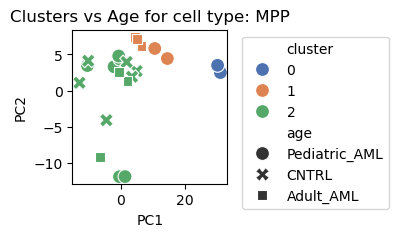

  Accuracy (cluster to label mapping): 0.478
------------------------------------------------------------
Processing cell type: Monocyte


/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2884569544.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


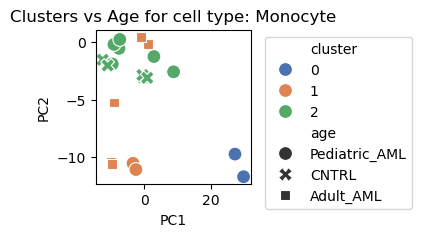

  Accuracy (cluster to label mapping): 0.652
------------------------------------------------------------
Processing cell type: NK cell


/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2884569544.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


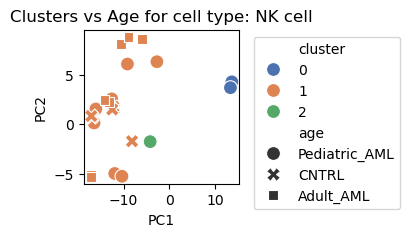

  Accuracy (cluster to label mapping): 0.435
------------------------------------------------------------
Processing cell type: Pre-cDC


/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2884569544.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


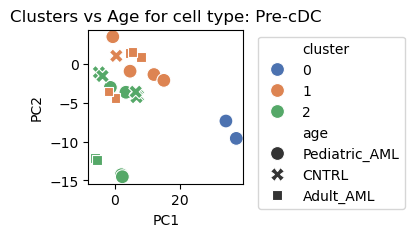

  Accuracy (cluster to label mapping): 0.522
------------------------------------------------------------
Processing cell type: Pre-pDC


/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2884569544.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


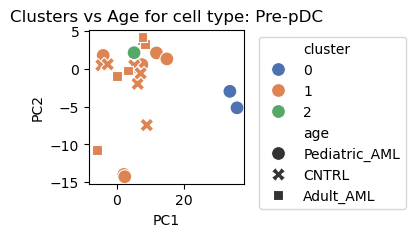

  Accuracy (cluster to label mapping): 0.435
------------------------------------------------------------
Processing cell type: ProMono


/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2884569544.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


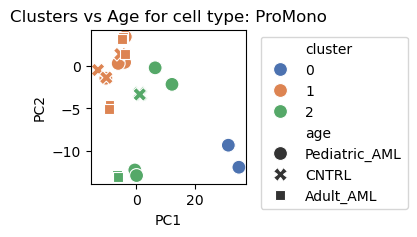

  Accuracy (cluster to label mapping): 0.478
------------------------------------------------------------
Processing cell type: Progenitor_Cycling


/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2884569544.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


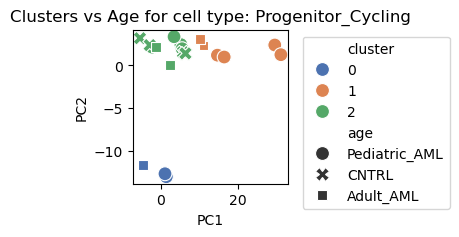

  Accuracy (cluster to label mapping): 0.500
------------------------------------------------------------
Processing cell type: T cell


/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2884569544.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


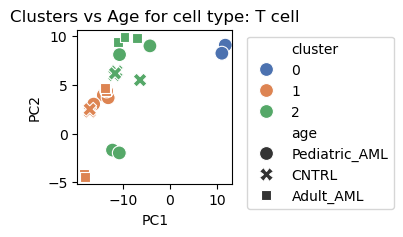

  Accuracy (cluster to label mapping): 0.435
------------------------------------------------------------
Processing cell type: pDC


/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2884569544.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


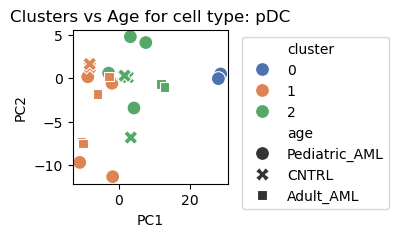

  Accuracy (cluster to label mapping): 0.455
------------------------------------------------------------


In [8]:
# Function to map clusters to true labels by majority vote
def map_clusters_to_labels(true_labels, cluster_labels):
    labels = np.unique(cluster_labels)
    mapping = {}
    for label in labels:
        idx = cluster_labels == label
        majority = pd.Series(true_labels[idx]).mode().iloc[0]
        mapping[label] = majority
    return mapping

# Use all principal components (i.e., columns starting with 'PC') as features
pc_features = [col for col in pca_df.columns if col.startswith('PC')]

# Group by cell type
for celltype, group_df in pca_df.groupby('cell_type'):
    print(f"Processing cell type: {celltype}")

    # Select all principal components as features for clustering
    X = group_df[pc_features].values

    # Apply KMeans (choose 3 clusters)
    kmeans = KMeans(n_clusters=3, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # True labels (age)
    true_labels = group_df['age'].values

    # Create DataFrame for plotting
    plot_df = group_df.copy()
    plot_df['cluster'] = cluster_labels

    # Scatter plot using only first 2 PCs for visualization
    plt.figure(figsize=(2, 2))
    sns.scatterplot(
        data=plot_df,
        x='PC1',
        y='PC2',
        hue='cluster',
        style='age',
        palette='deep',
        s=100
    )
    plt.title(f'Clusters vs Age for cell type: {celltype}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Map cluster IDs to actual labels
    cluster_to_label = map_clusters_to_labels(true_labels, cluster_labels)
    predicted_labels = [cluster_to_label[c] for c in cluster_labels]

    # Compute accuracy
    acc = accuracy_score(true_labels, predicted_labels)
    print(f"  Accuracy (cluster to label mapping): {acc:.3f}")
    print("-" * 60)

# Hierarchical clustering con tutti i tipi di linkage

In [9]:
# Function to map each cluster to the most frequent true label (e.g., age)
def map_clusters_to_labels(true_labels, cluster_labels):
    labels = np.unique(cluster_labels)
    mapping = {}
    for label in labels:
        idx = cluster_labels == label
        majority = pd.Series(true_labels[idx]).mode().iloc[0]
        mapping[label] = majority
    return mapping

# Select all PCA columns
pca_columns = [col for col in pca_df.columns if col.startswith('PC')]

# Create sub-datasets: for each cell type, extract only the PCA columns into a NumPy array
subdatasets = {}
for celltype, group_df in pca_df.groupby('cell_type'):
    subdatasets[celltype] = group_df[pca_columns].values

# Define distance metrics and linkage methods to test
distance_metrics = [
    'euclidean', 'sqeuclidean', 'cityblock', 'cosine', 'correlation', 'hamming',
    'jaccard', 'chebyshev', 'canberra', 'braycurtis'
]
linkage_methods = ['average', 'complete', 'single']

# Dictionary to store results
results = {}

# Run hierarchical clustering for each cell type
for celltype, data in subdatasets.items():
    print(f"Results for {celltype}:")
    subset_meta = pca_df[pca_df['cell_type'] == celltype]
    true_labels = subset_meta['age'].values

    results[celltype] = {}

    # Try each distance metric
    for metric in distance_metrics:
        best_accuracy = -1
        best_method = None

        # Try each linkage method
        for method in linkage_methods:
            try:
                Z = linkage(data, method=method, metric=metric)
                cluster_labels = fcluster(Z, t=3, criterion='maxclust')
                cluster_to_label = map_clusters_to_labels(true_labels, cluster_labels)
                predicted_labels = [cluster_to_label[c] for c in cluster_labels]
                acc = accuracy_score(true_labels, predicted_labels)

                # Keep the best method for this metric
                if acc > best_accuracy:
                    best_accuracy = acc
                    best_method = method
            except Exception as e:
                print(f"  Warning: metric {metric} with linkage {method} failed: {e}")

        results[celltype][metric] = (best_accuracy, best_method)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df.columns = distance_metrics

# Extract accuracy values
accuracy_df = pd.DataFrame({
    col: [results_df[col][i][0] for i in results_df.index]
    for col in results_df.columns
}, index=results_df.index)

# Extract best linkage method for each distance metric
method_df = pd.DataFrame({
    col: [results_df[col][i][1] for i in results_df.index]
    for col in results_df.columns
}, index=results_df.index)

# Combine both accuracy and method DataFrames
final_df = pd.concat([accuracy_df, method_df], keys=['Accuracy', 'Linkage Method'], axis=1)

print(final_df)

Results for B cell:
Results for B_prog:
Results for CLP:
Results for Dendritic cell:
Results for Early GMP:
Results for Erythroid:
Results for GMP:
Results for HSC:
Results for LMPP:
Results for MEP_prog:
Results for MPP:
Results for Monocyte:
Results for NK cell:
Results for Pre-cDC:
Results for Pre-pDC:
Results for ProMono:
Results for Progenitor_Cycling:
Results for T cell:
Results for pDC:
                    Accuracy                                              \
                   euclidean sqeuclidean cityblock    cosine correlation   
B cell              0.434783    0.434783  0.521739  0.434783    0.521739   
B_prog              0.478261    0.478261  0.652174  0.521739    0.521739   
CLP                 0.434783    0.434783  0.434783  0.478261    0.478261   
Dendritic cell      0.454545    0.454545  0.500000  0.545455    0.545455   
Early GMP           0.478261    0.478261  0.521739  0.521739    0.521739   
Erythroid           0.478261    0.478261  0.478261  0.478261    0.47826

# Hierarchical clustering (separately)

Results for B cell:
Results for B_prog:
Results for CLP:
Results for Dendritic cell:
Results for Early GMP:
Results for Erythroid:
Results for GMP:
Results for HSC:
Results for LMPP:
Results for MEP_prog:
Results for MPP:
Results for Monocyte:
Results for NK cell:
Results for Pre-cDC:
Results for Pre-pDC:
Results for ProMono:
Results for Progenitor_Cycling:
Results for T cell:
Results for pDC:

Results for average linkage:
                    euclidean  sqeuclidean  cityblock    cosine  correlation  \
B cell               0.434783     0.434783   0.521739  0.434783     0.434783   
B_prog               0.478261     0.478261   0.652174  0.521739     0.521739   
CLP                  0.434783     0.434783   0.434783  0.434783     0.434783   
Dendritic cell       0.454545     0.454545   0.500000  0.545455     0.545455   
Early GMP            0.434783     0.434783   0.521739  0.434783     0.434783   
Erythroid            0.478261     0.478261   0.478261  0.478261     0.478261   
GMP          

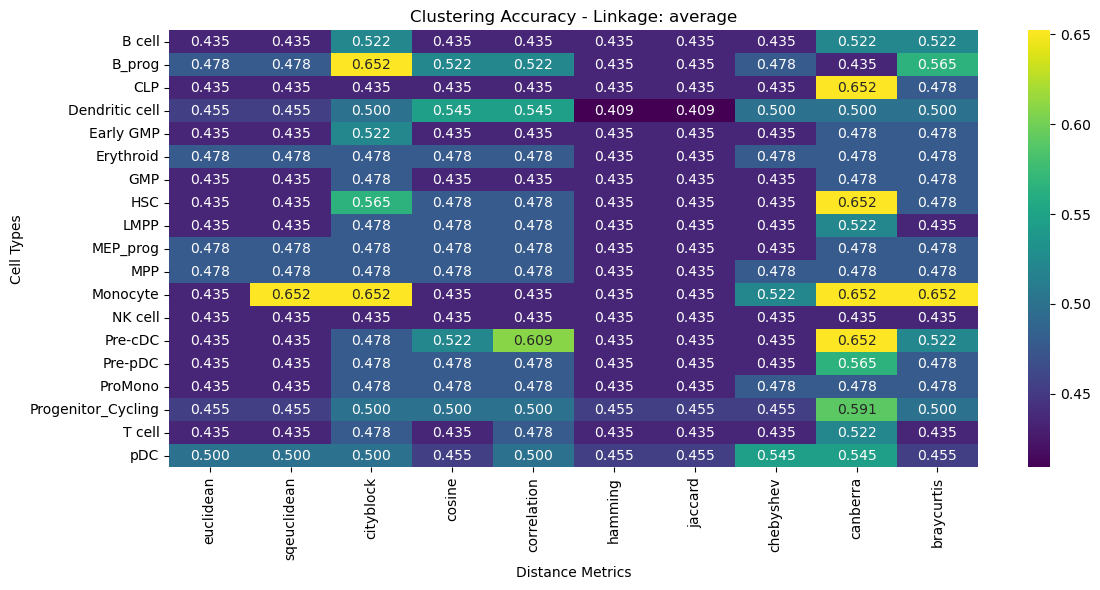

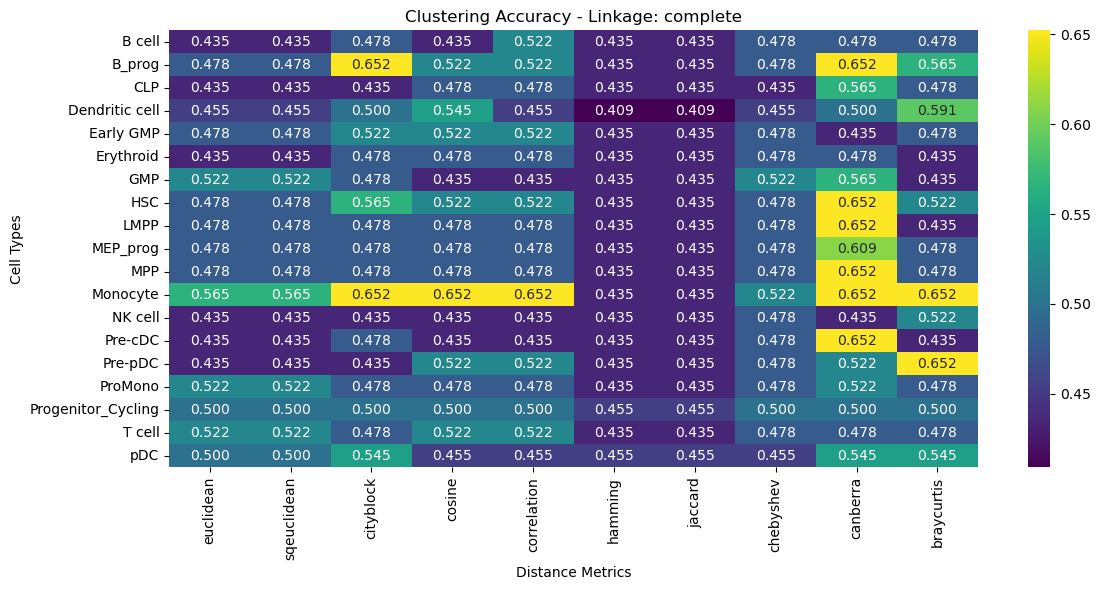

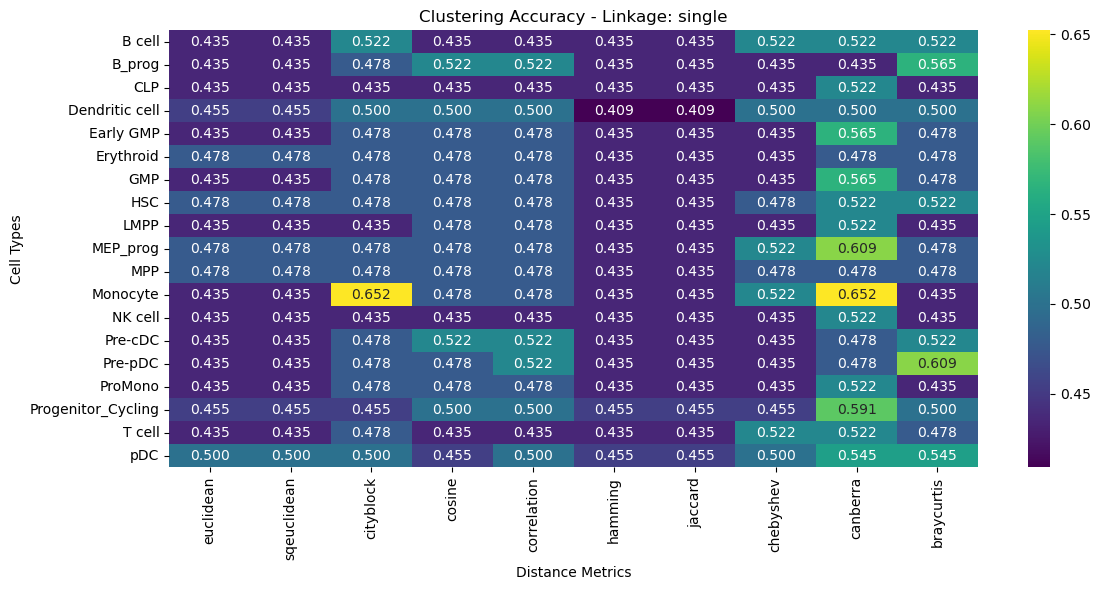

In [11]:
# Function to map each cluster to the most frequent label (e.g., age)
def map_clusters_to_labels(true_labels, cluster_labels):
    labels = np.unique(cluster_labels)
    mapping = {}
    for label in labels:
        idx = cluster_labels == label
        majority = pd.Series(true_labels[idx]).mode().iloc[0]
        mapping[label] = majority
    return mapping

# Select all PCA columns (those starting with "PC")
pca_columns = [col for col in pca_df.columns if col.startswith('PC')]

# Create subdatasets for each cell type using only PCA columns
subdatasets = {}
for celltype, group_df in pca_df.groupby('cell_type'):
    subdatasets[celltype] = group_df[pca_columns].values

# Define linkage methods and distance metrics to test
linkage_methods = ['average', 'complete', 'single']
distance_metrics = [
    'euclidean', 'sqeuclidean', 'cityblock', 'cosine', 'correlation', 'hamming',
    'jaccard', 'chebyshev', 'canberra', 'braycurtis'
]

# Dictionary to collect results
results_linkage = {method: {} for method in linkage_methods}

# Loop over all subdatasets (one per cell type)
for celltype, data in subdatasets.items():
    print(f"Results for {celltype}:")
    subset_meta = pca_df[pca_df['cell_type'] == celltype]
    true_labels = subset_meta['age'].values

    for method in linkage_methods:
        results_linkage[method][celltype] = {}

        for metric in distance_metrics:
            try:
                # Perform hierarchical clustering
                Z = linkage(data, method=method, metric=metric)
                cluster_labels = fcluster(Z, t=3, criterion='maxclust')

                # Map cluster labels to true labels
                cluster_to_label = map_clusters_to_labels(true_labels, cluster_labels)
                predicted_labels = [cluster_to_label[c] for c in cluster_labels]

                # Compute clustering accuracy
                acc = accuracy_score(true_labels, predicted_labels)
            except Exception as e:
                # Handle incompatible metric-method combinations with warning
                print(f"Warning: metric '{metric}' with linkage '{method}' failed for {celltype}: {e}")
                acc = np.nan

            results_linkage[method][celltype][metric] = acc

# Create a DataFrame for each linkage method to organize results
results_df = {}
for method in linkage_methods:
    method_results = pd.DataFrame(results_linkage[method]).T
    method_results.columns = distance_metrics
    results_df[method] = method_results

# Print results separately for each linkage method
for method in linkage_methods:
    print(f"\nResults for {method} linkage:")
    print(results_df[method])

# Plot heatmap for each linkage method
for method in linkage_methods:
    plt.figure(figsize=(12, 6))
    sns.heatmap(results_df[method], annot=True, cmap='viridis', fmt=".3f", cbar=True)
    plt.title(f"Clustering Accuracy - Linkage: {method}")
    plt.ylabel("Cell Types")
    plt.xlabel("Distance Metrics")
    plt.tight_layout()
    plt.show()

In [ ]:
# In the following 3 cells there are some examples: we perform a cluster for Pre-pDC cells using Canberra, cosine and
# correlation metrics (always using the average linkage because it seems the best one)

/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/3422843414.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', len(unique_clusters))


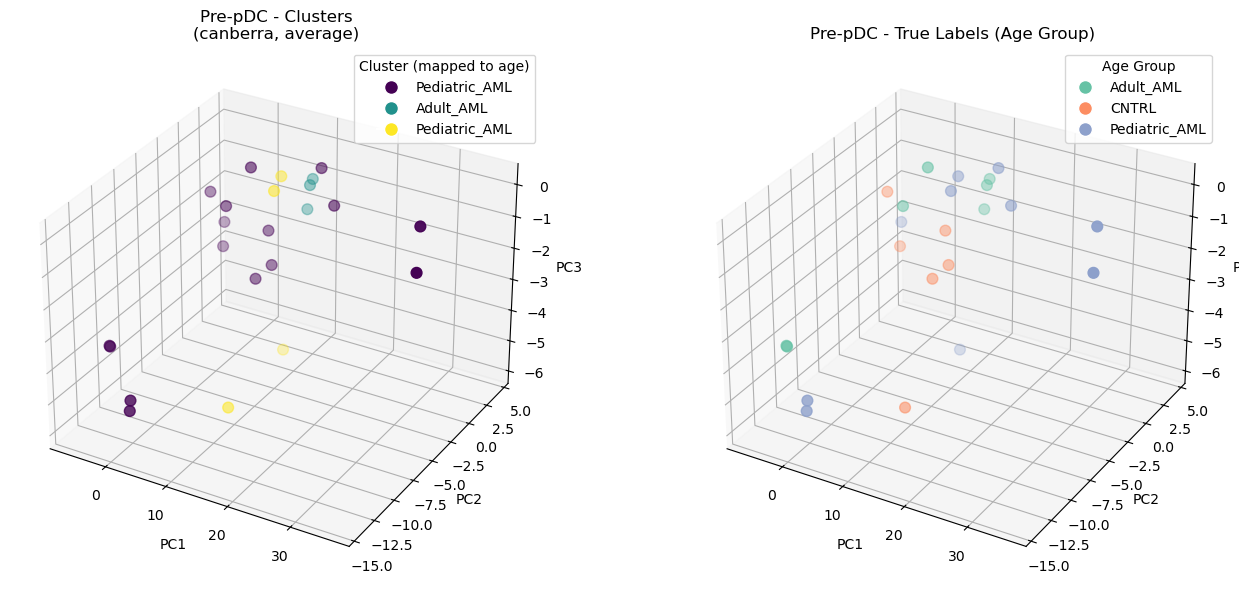

In [13]:
# Parameters
celltype = 'Pre-pDC'
distance_metric = 'canberra'
linkage_method = 'average'

# Data: make sure subdatasets[celltype] is a NumPy array or DataFrame
data = subdatasets[celltype]  # numpy array (n_samples x n_features)
subset_meta = pca_df[pca_df['cell_type'] == celltype]  # Filter original DataFrame for the selected cell type
true_labels = subset_meta['age'].values  # True age labels

# Perform hierarchical clustering
Z = linkage(data, method=linkage_method, metric=distance_metric)
cluster_labels = fcluster(Z, t=3, criterion='maxclust')  # Force 3 clusters

# 3D coordinates (assuming at least 3 PCA components)
x = data[:, 0]  # PC1
y = data[:, 1]  # PC2
z = data[:, 2]  # PC3

# Initialize figure
fig = plt.figure(figsize=(14, 6))

# Map cluster IDs to the most frequent true labels
cluster_to_label = map_clusters_to_labels(true_labels, cluster_labels)

# Colors for clusters (use discrete colormap)
unique_clusters = np.unique(cluster_labels)
cmap = plt.cm.get_cmap('viridis', len(unique_clusters))
colors_cluster = [cmap(cluster - 1) for cluster in cluster_labels]

# Plot: Clustering results
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(x, y, z, c=colors_cluster, s=60)
ax1.set_title(f'{celltype} - Clusters\n({distance_metric}, {linkage_method})')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

# Legend for clusters (mapped to age groups)
handles = []
for cluster in sorted(cluster_to_label.keys()):
    color = cmap(cluster - 1)
    label = cluster_to_label[cluster]
    handles.append(plt.Line2D([0], [0], marker='o', color='w', label=label,
                              markerfacecolor=color, markersize=10))
ax1.legend(handles=handles, title='Cluster (mapped to age)', loc='upper right')

# Plot: True age group labels
ax2 = fig.add_subplot(122, projection='3d')
unique_true = np.unique(true_labels)
palette = dict(zip(unique_true, sns.color_palette("Set2", len(unique_true))))
colors_true = [palette[label] for label in true_labels]
scatter2 = ax2.scatter(x, y, z, c=colors_true, s=60)
ax2.set_title(f'{celltype} - True Labels (Age Group)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

# Legend for true age groups
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=color, markersize=10)
           for label, color in palette.items()]
ax2.legend(handles=handles, title='Age Group', loc='upper right')

plt.tight_layout()
plt.show()

/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/2787629038.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', len(unique_clusters))


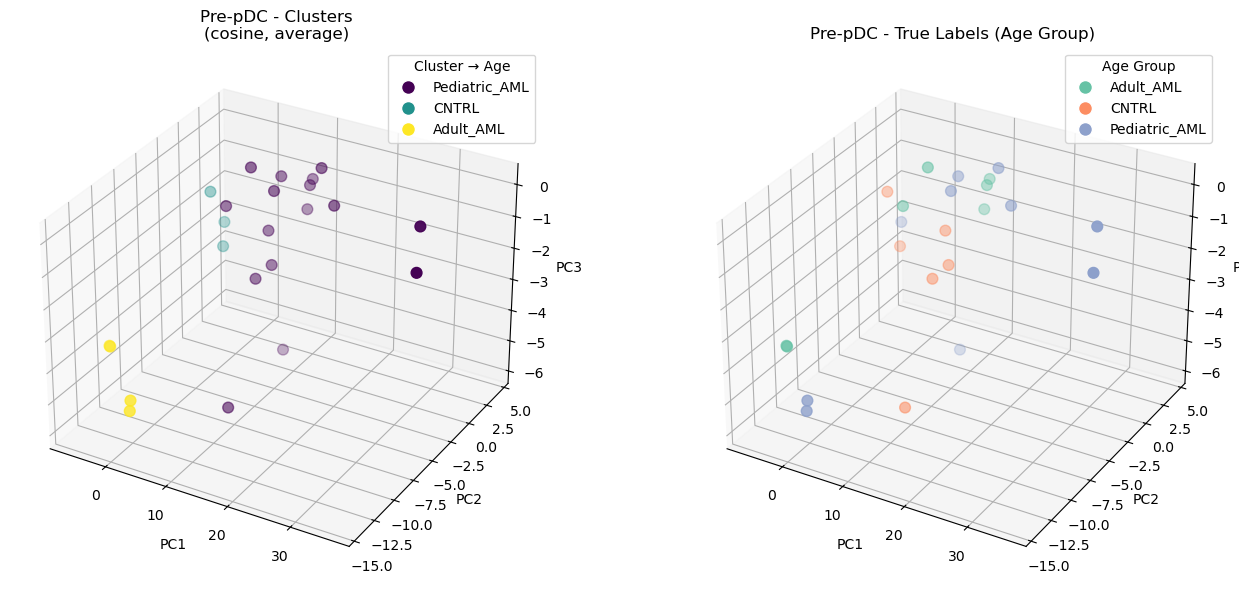

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Parameters
celltype = 'Pre-pDC'
distance_metric = 'cosine'
linkage_method = 'average'

# Data: make sure this is a DataFrame or NumPy array with at least 3 PCA components
data = subdatasets[celltype]  # PCA-reduced data (n_samples x n_features)
subset_meta = pca_df[pca_df['cell_type'] == celltype]  # Filter metadata for the current cell type
true_labels = subset_meta['age'].values  # True age group labels

# Perform hierarchical clustering
Z = linkage(data, method=linkage_method, metric=distance_metric)
cluster_labels = fcluster(Z, t=3, criterion='maxclust')  # Force the formation of 3 clusters

# 3D coordinates from the first 3 principal components
x = data[:, 0]  # PC1
y = data[:, 1]  # PC2
z = data[:, 2]  # PC3

# Map each cluster to the most frequent true label
cluster_to_label = map_clusters_to_labels(true_labels, cluster_labels)

# Assign a unique color to each cluster
unique_clusters = np.unique(cluster_labels)
cmap = plt.cm.get_cmap('viridis', len(unique_clusters))
cluster_colors = [cmap(c - 1) for c in cluster_labels]

# Set up the plot
fig = plt.figure(figsize=(14, 6))

# Plot: Cluster assignments
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, c=cluster_colors, s=60)
ax1.set_title(f'{celltype} - Clusters\n({distance_metric}, {linkage_method})')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

# Legend: Cluster labels mapped to age groups
handles_cluster = []
for cluster in sorted(cluster_to_label):
    color = cmap(cluster - 1)
    label = cluster_to_label[cluster]
    handles_cluster.append(plt.Line2D([0], [0], marker='o', color='w', label=label,
                                      markerfacecolor=color, markersize=10))
ax1.legend(handles=handles_cluster, title='Cluster → Age', loc='upper right')

# Plot: True age group labels
ax2 = fig.add_subplot(122, projection='3d')
unique_ages = np.unique(true_labels)
palette = dict(zip(unique_ages, sns.color_palette("Set2", len(unique_ages))))
age_colors = [palette[age] for age in true_labels]

ax2.scatter(x, y, z, c=age_colors, s=60)
ax2.set_title(f'{celltype} - True Labels (Age Group)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

# Legend: True age groups
handles_age = [
    plt.Line2D([0], [0], marker='o', color='w', label=age,
               markerfacecolor=color, markersize=10)
    for age, color in palette.items()
]
ax2.legend(handles=handles_age, title='Age Group', loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# In the following cells we perform the clustering using complete linkage and the cranberra distance (which proved to be the best)
# We compute the CPCC Cophenetic Correlation Coefficient
# We plot the matrices of the Cranberra distance and Cophenet distance and we compare the results to evaluate the goodness of the clustering 

Clustering for cell type: B cell
Cophenetic Correlation Coefficient (CPCC): 0.726
Accuracy compared to 'age': 0.478


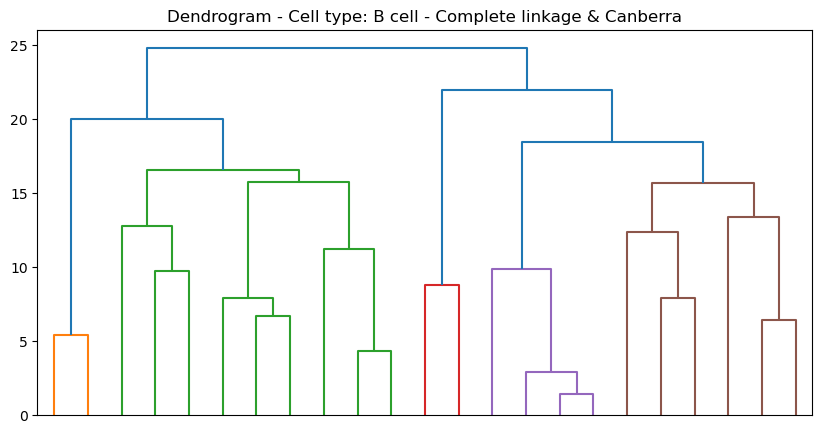

Clustering for cell type: B_prog
Cophenetic Correlation Coefficient (CPCC): 0.931
Accuracy compared to 'age': 0.652


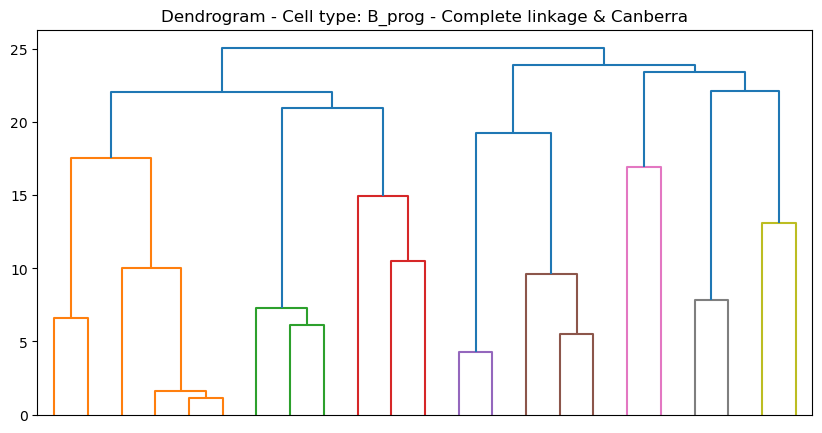

Clustering for cell type: CLP
Cophenetic Correlation Coefficient (CPCC): 0.873
Accuracy compared to 'age': 0.565


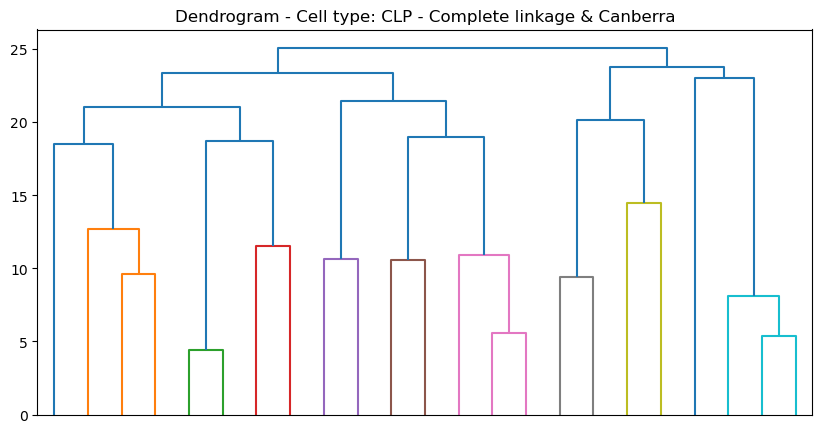

Clustering for cell type: Dendritic cell
Cophenetic Correlation Coefficient (CPCC): 0.928
Accuracy compared to 'age': 0.500


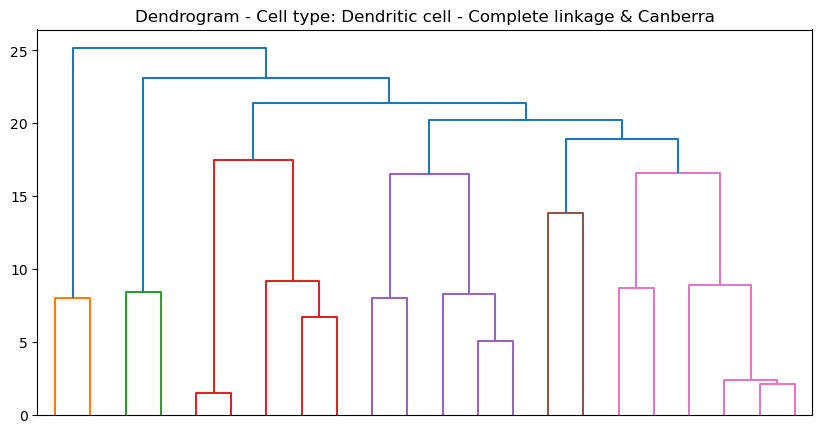

Clustering for cell type: Early GMP
Cophenetic Correlation Coefficient (CPCC): 0.939
Accuracy compared to 'age': 0.435


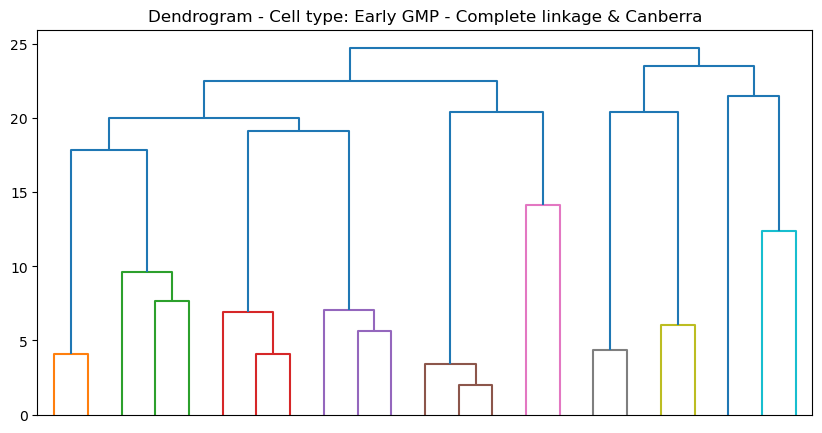

Clustering for cell type: Erythroid
Cophenetic Correlation Coefficient (CPCC): 0.937
Accuracy compared to 'age': 0.478


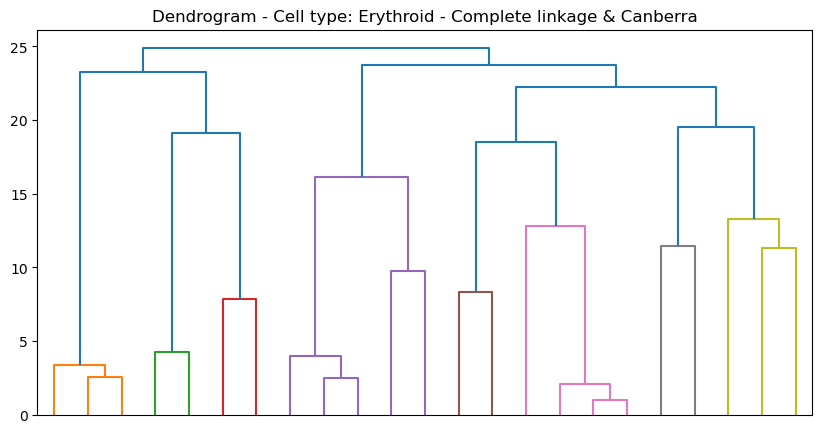

Clustering for cell type: GMP
Cophenetic Correlation Coefficient (CPCC): 0.901
Accuracy compared to 'age': 0.565


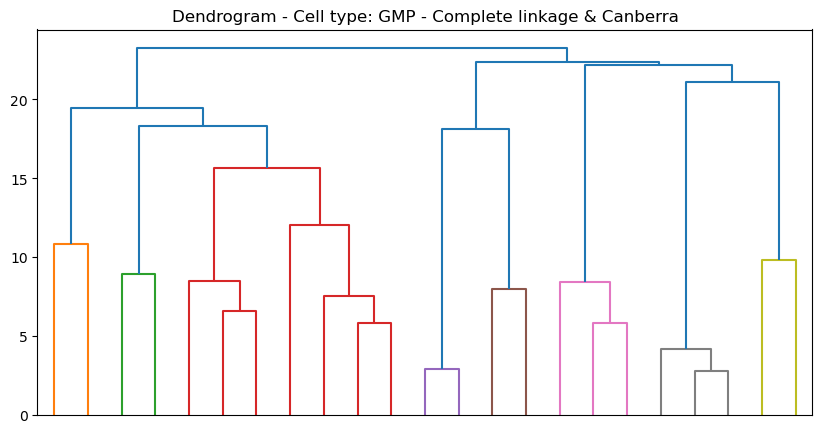

Clustering for cell type: HSC
Cophenetic Correlation Coefficient (CPCC): 0.909
Accuracy compared to 'age': 0.652


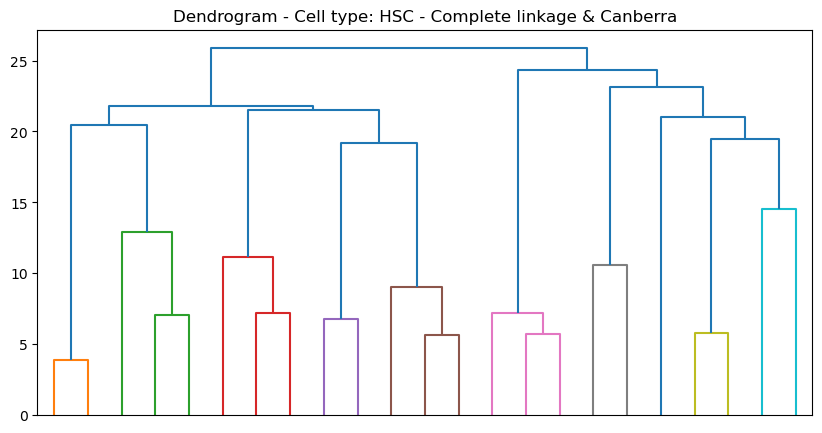

Clustering for cell type: LMPP
Cophenetic Correlation Coefficient (CPCC): 0.930
Accuracy compared to 'age': 0.652


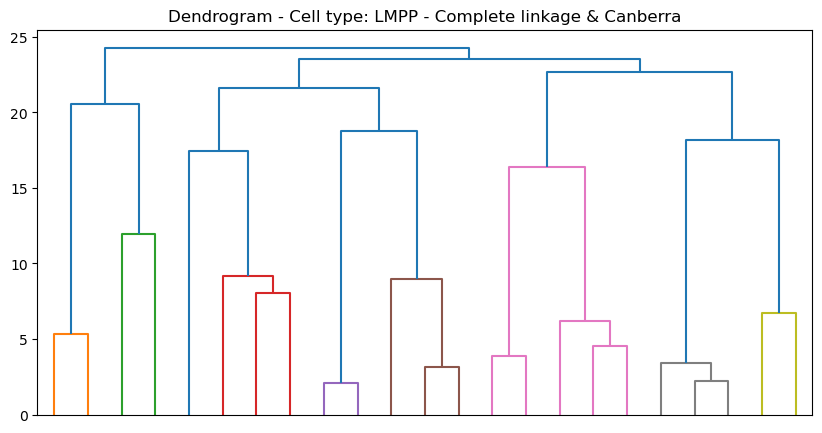

Clustering for cell type: MEP_prog
Cophenetic Correlation Coefficient (CPCC): 0.930
Accuracy compared to 'age': 0.609


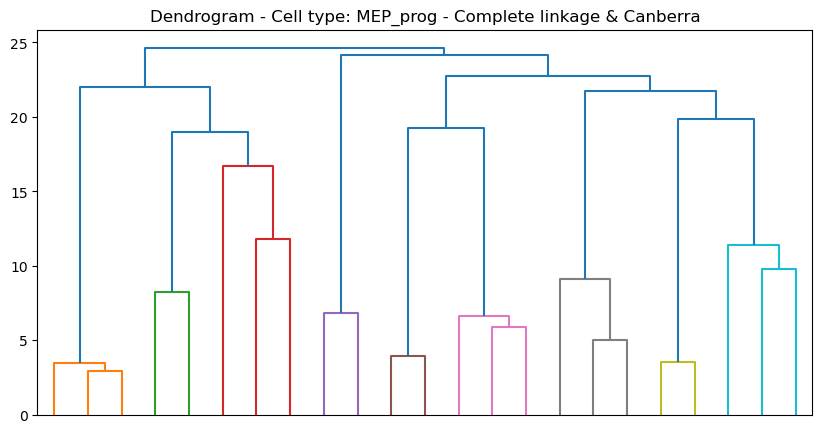

Clustering for cell type: MPP
Cophenetic Correlation Coefficient (CPCC): 0.871
Accuracy compared to 'age': 0.652


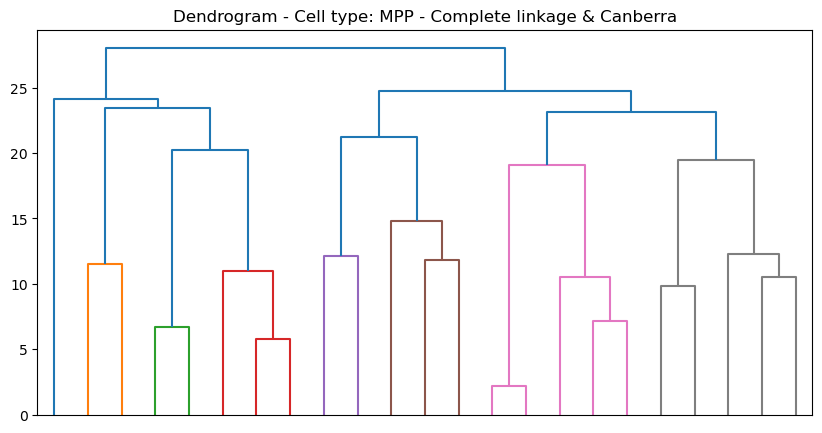

Clustering for cell type: Monocyte
Cophenetic Correlation Coefficient (CPCC): 0.909
Accuracy compared to 'age': 0.652


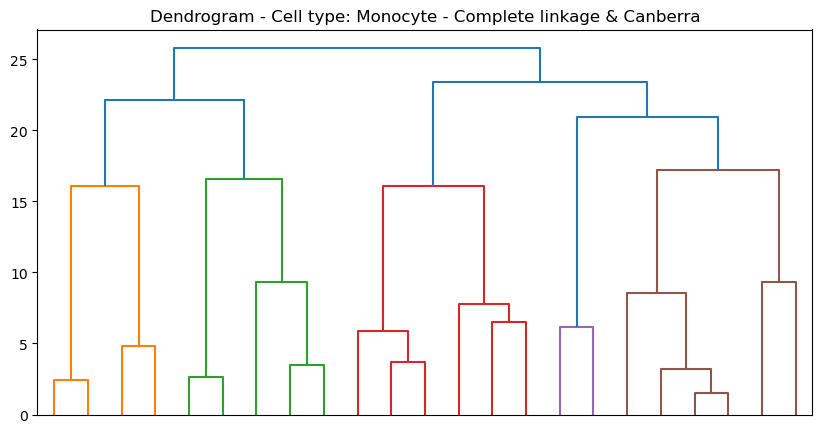

Clustering for cell type: NK cell
Cophenetic Correlation Coefficient (CPCC): 0.872
Accuracy compared to 'age': 0.435


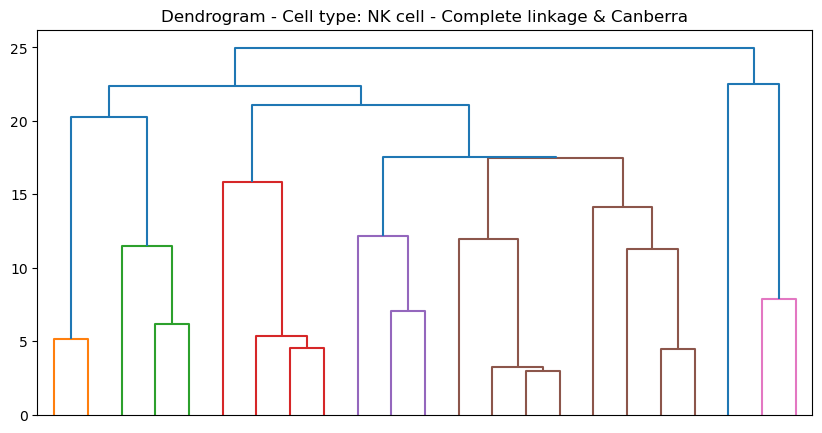

Clustering for cell type: Pre-cDC
Cophenetic Correlation Coefficient (CPCC): 0.896
Accuracy compared to 'age': 0.652


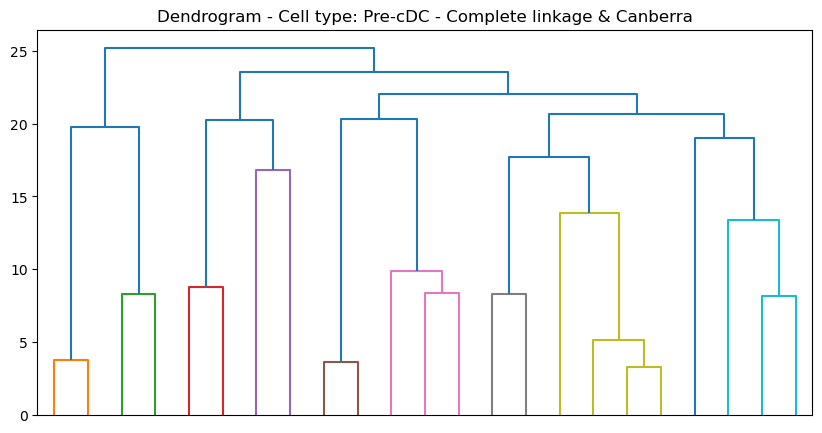

Clustering for cell type: Pre-pDC
Cophenetic Correlation Coefficient (CPCC): 0.838
Accuracy compared to 'age': 0.522


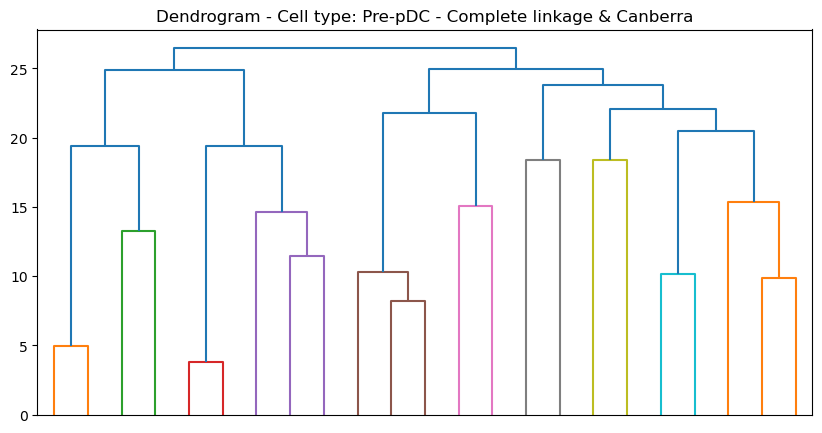

Clustering for cell type: ProMono
Cophenetic Correlation Coefficient (CPCC): 0.880
Accuracy compared to 'age': 0.522


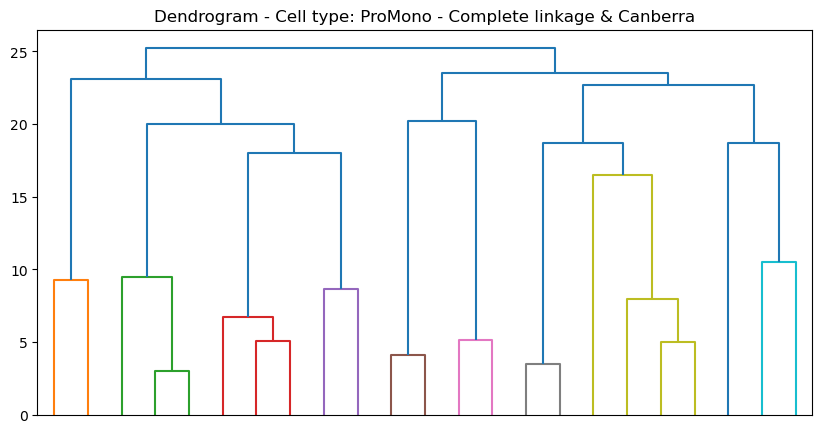

Clustering for cell type: Progenitor_Cycling
Cophenetic Correlation Coefficient (CPCC): 0.886
Accuracy compared to 'age': 0.500


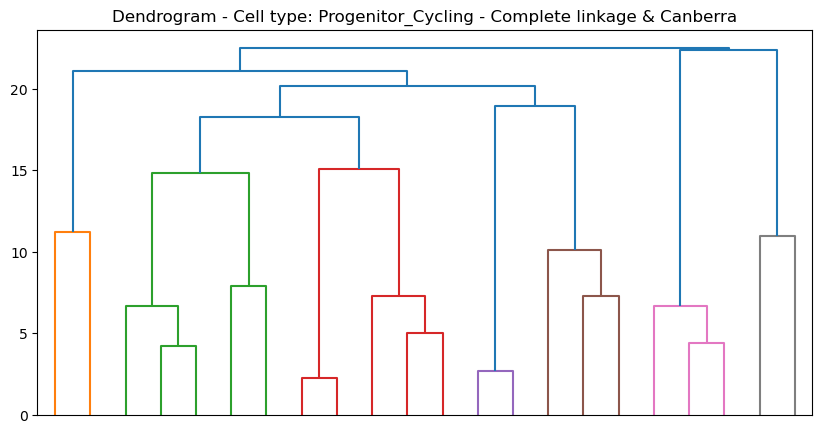

Clustering for cell type: T cell
Cophenetic Correlation Coefficient (CPCC): 0.819
Accuracy compared to 'age': 0.478


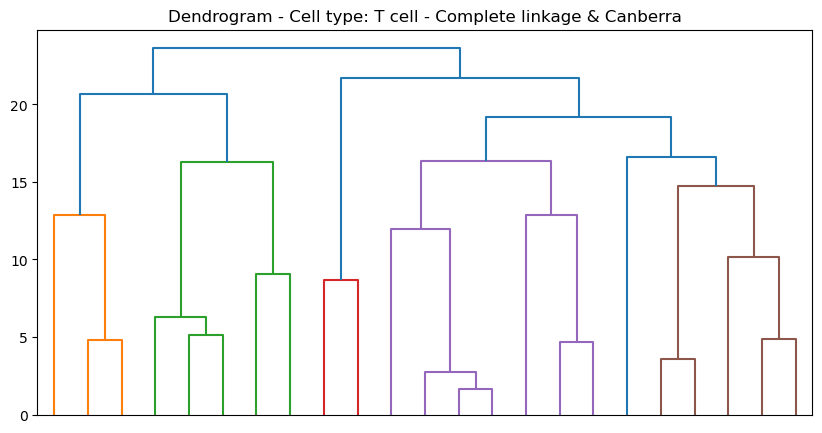

Clustering for cell type: pDC
Cophenetic Correlation Coefficient (CPCC): 0.868
Accuracy compared to 'age': 0.545


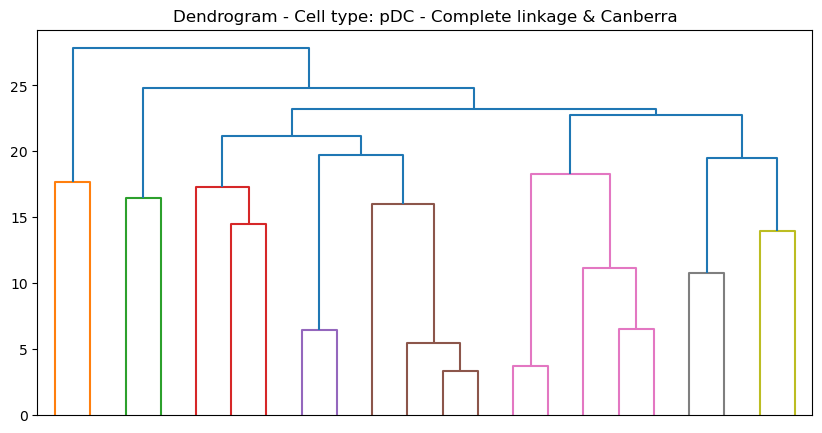

In [16]:
# Select all PCA columns (those starting with 'PC')
pca_columns = [col for col in pca_df.columns if col.startswith('PC')]

# Create subdatasets for each cell type using only PCA columns
subdatasets = {
    celltype: group_df[pca_columns].values
    for celltype, group_df in pca_df.groupby('cell_type')
}

results = {}

# Loop over each cell type
for celltype, data in subdatasets.items():
    print(f"Clustering for cell type: {celltype}")

    # Compute distance matrix with Canberra metric
    dist_matrix = pdist(data, metric='canberra')

    # Perform hierarchical clustering using complete linkage
    Z = linkage(data, method='complete', metric='canberra')

    # Extract flat cluster labels with 3 clusters (change t if needed)
    cluster_labels = fcluster(Z, t=3, criterion='maxclust')

    # Compute Cophenetic Correlation Coefficient (CPCC)
    coph_corr, coph_dists = cophenet(Z, dist_matrix)
    print(f"Cophenetic Correlation Coefficient (CPCC): {coph_corr:.3f}")

    # If you want to compare to ground truth labels (e.g., 'age')
    true_labels = pca_df[pca_df['cell_type'] == celltype]['age'].values

    # Map each cluster to the most frequent true label
    def map_clusters_to_labels(true_labels, cluster_labels):
        labels = np.unique(cluster_labels)
        mapping = {}
        for label in labels:
            idx = cluster_labels == label
            majority = pd.Series(true_labels[idx]).mode().iloc[0]
            mapping[label] = majority
        return mapping

    cluster_to_label = map_clusters_to_labels(true_labels, cluster_labels)
    predicted_labels = [cluster_to_label[c] for c in cluster_labels]

    # Compute clustering accuracy with respect to true labels
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(true_labels, predicted_labels)
    print(f"Accuracy compared to 'age': {acc:.3f}")

    # Store results
    results[celltype] = {
        'Z': Z,
        'cluster_labels': cluster_labels,
        'CPCC': coph_corr,
        'accuracy': acc
    }

    # Optional: plot dendrogram
    import scipy.cluster.hierarchy as sch
    plt.figure(figsize=(10, 5))
    sch.dendrogram(Z, no_labels=True)
    plt.title(f"Dendrogram - Cell type: {celltype} - Complete linkage & Canberra")
    plt.show()

Distance comparison for cell type: B cell
CPCC: 0.726


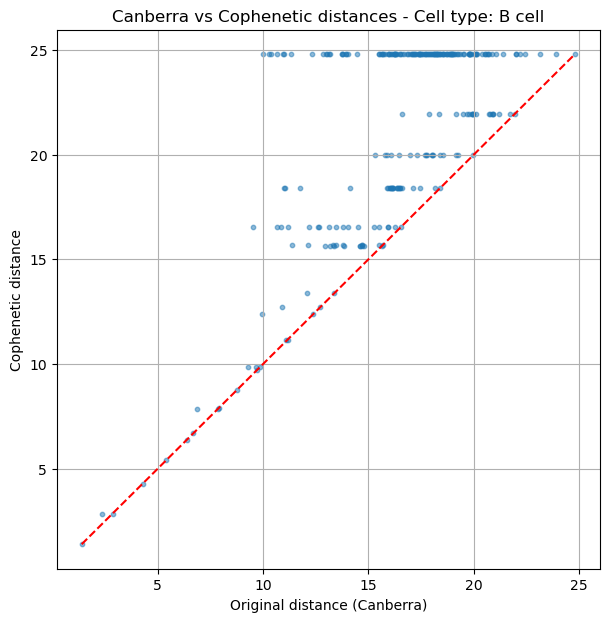

Distance comparison for cell type: B_prog
CPCC: 0.931


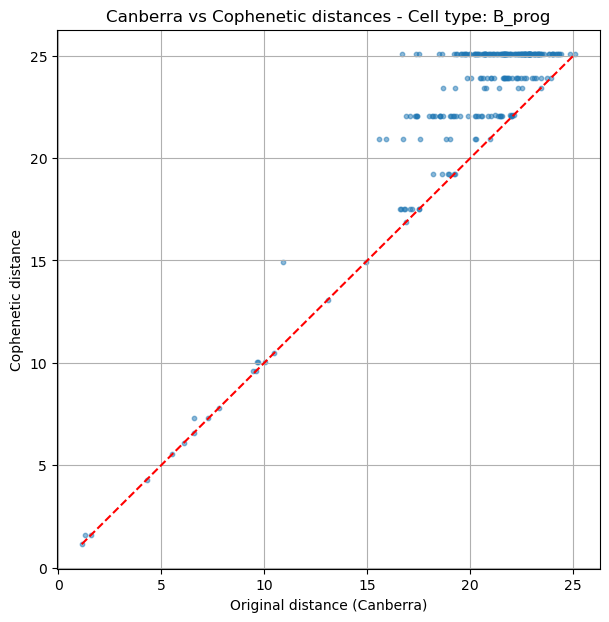

Distance comparison for cell type: CLP
CPCC: 0.873


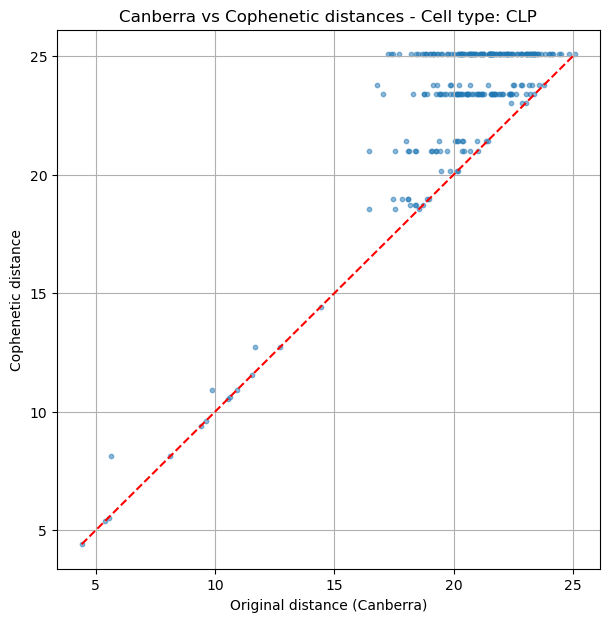

Distance comparison for cell type: Dendritic cell
CPCC: 0.928


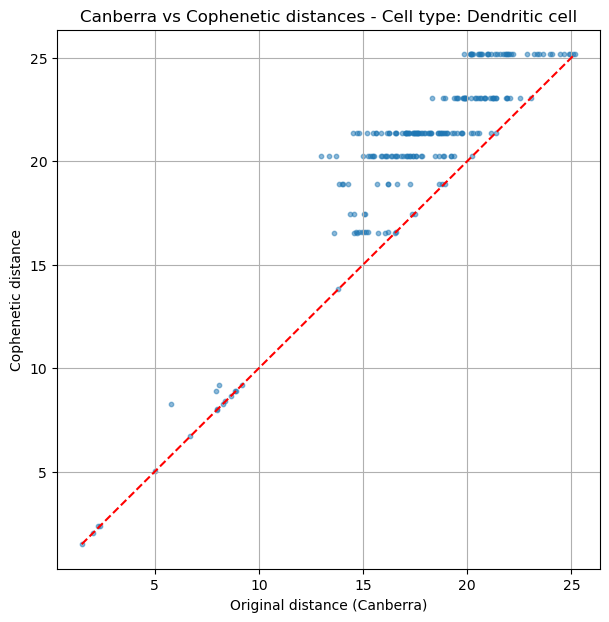

Distance comparison for cell type: Early GMP
CPCC: 0.939


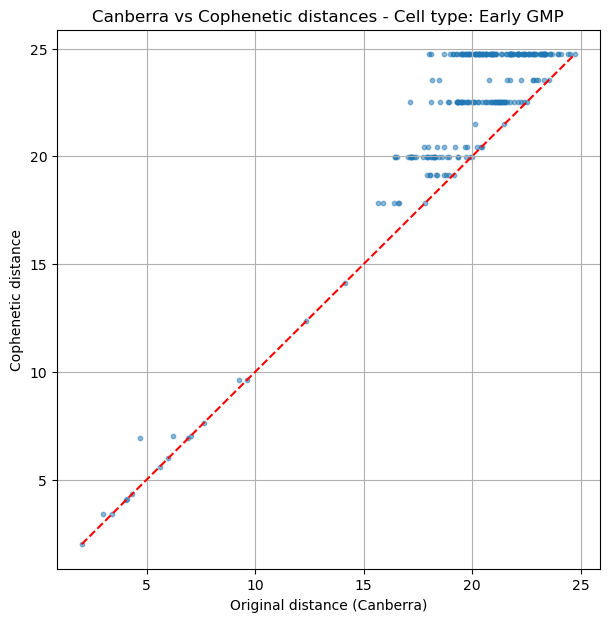

Distance comparison for cell type: Erythroid
CPCC: 0.937


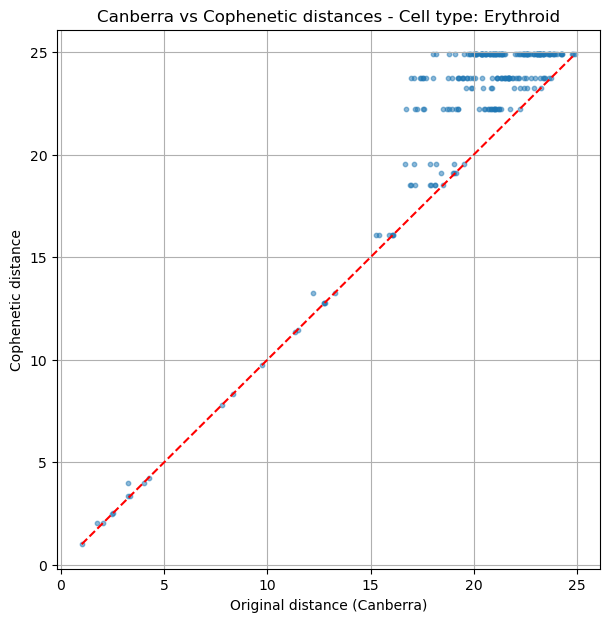

Distance comparison for cell type: GMP
CPCC: 0.901


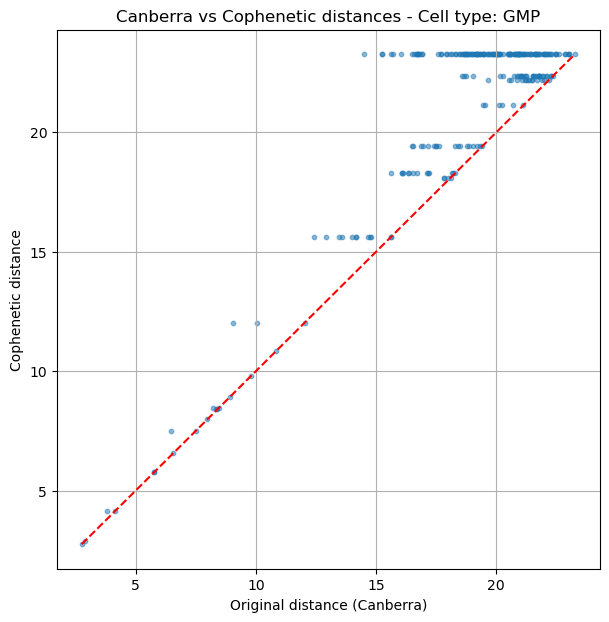

Distance comparison for cell type: HSC
CPCC: 0.909


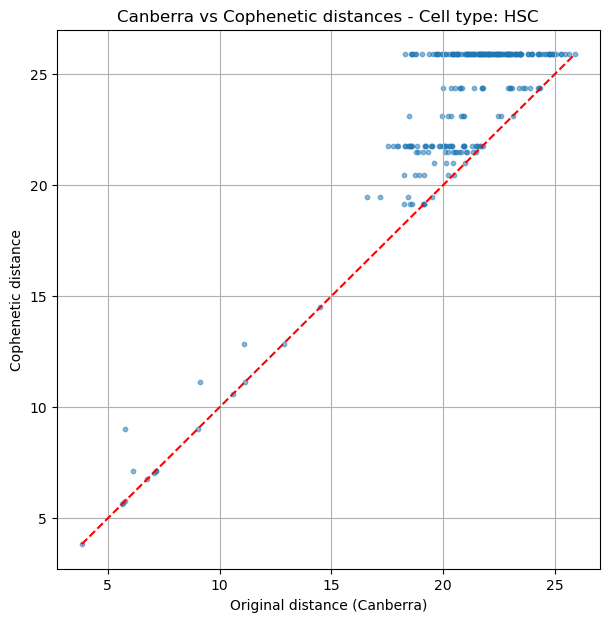

Distance comparison for cell type: LMPP
CPCC: 0.930


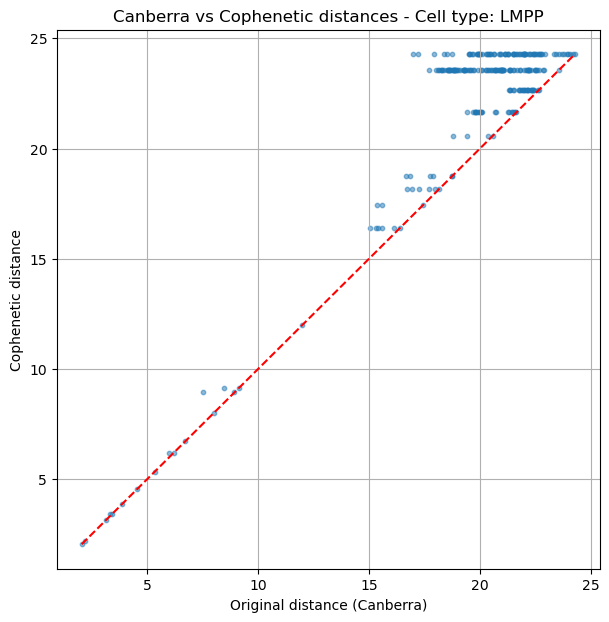

Distance comparison for cell type: MEP_prog
CPCC: 0.930


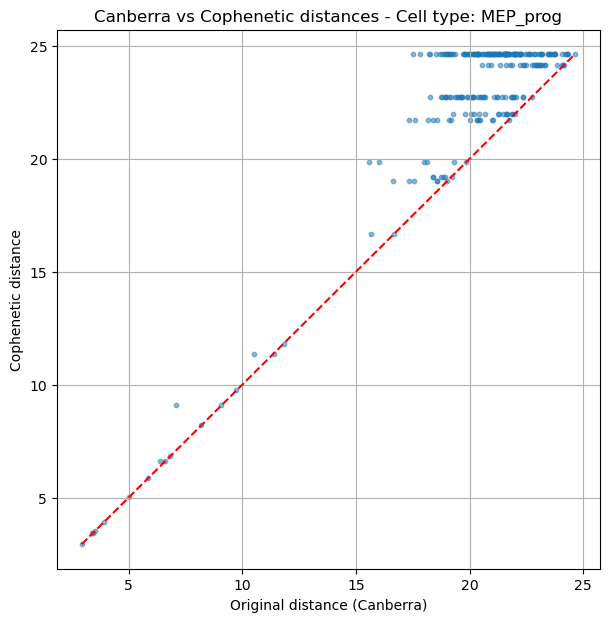

Distance comparison for cell type: MPP
CPCC: 0.871


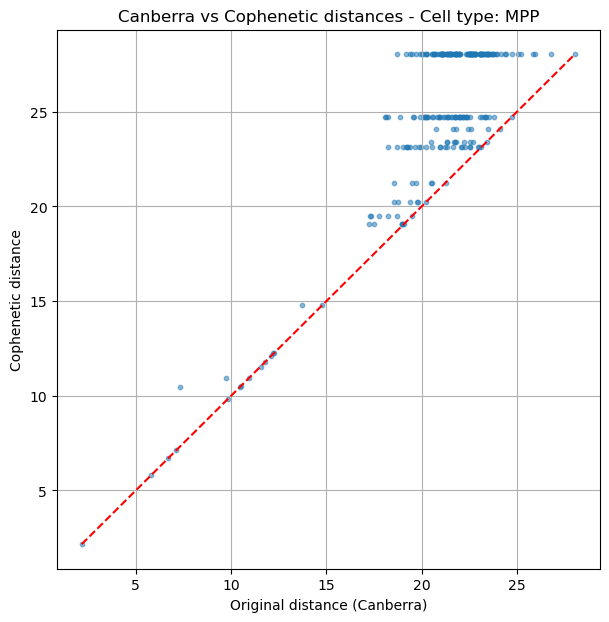

Distance comparison for cell type: Monocyte
CPCC: 0.909


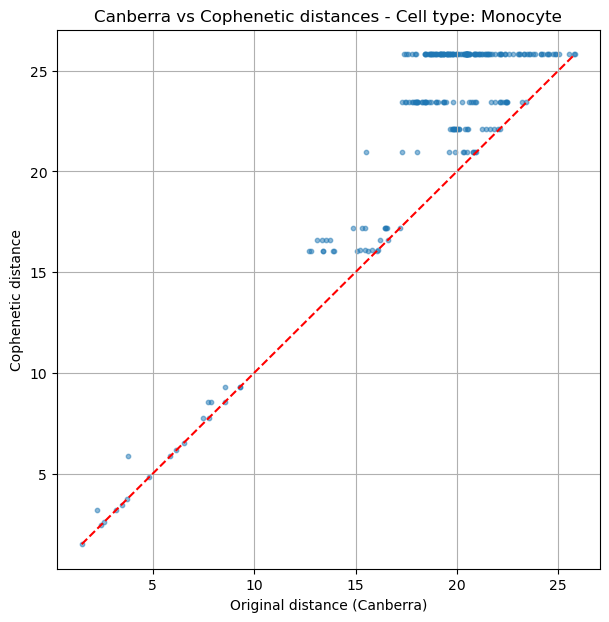

Distance comparison for cell type: NK cell
CPCC: 0.872


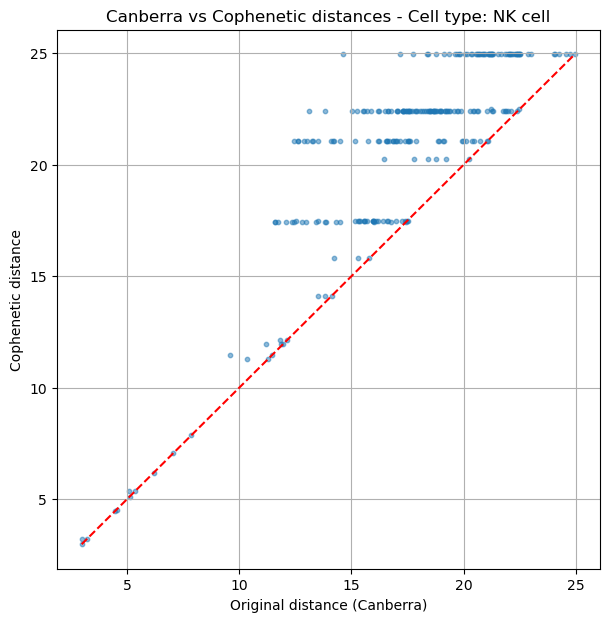

Distance comparison for cell type: Pre-cDC
CPCC: 0.896


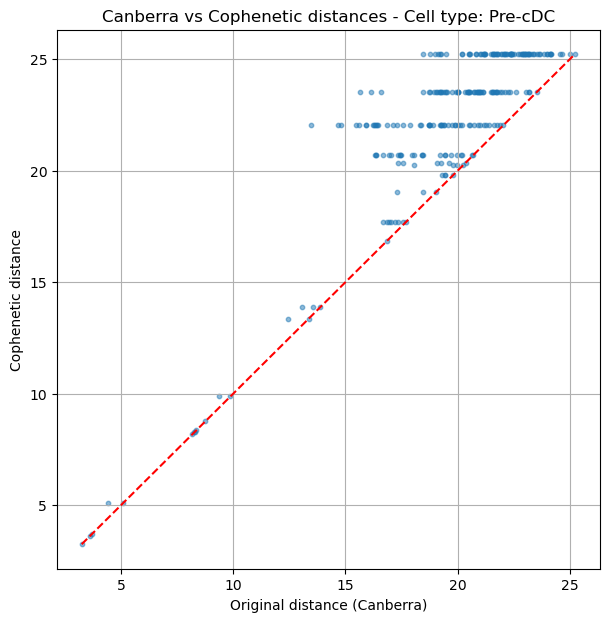

Distance comparison for cell type: Pre-pDC
CPCC: 0.838


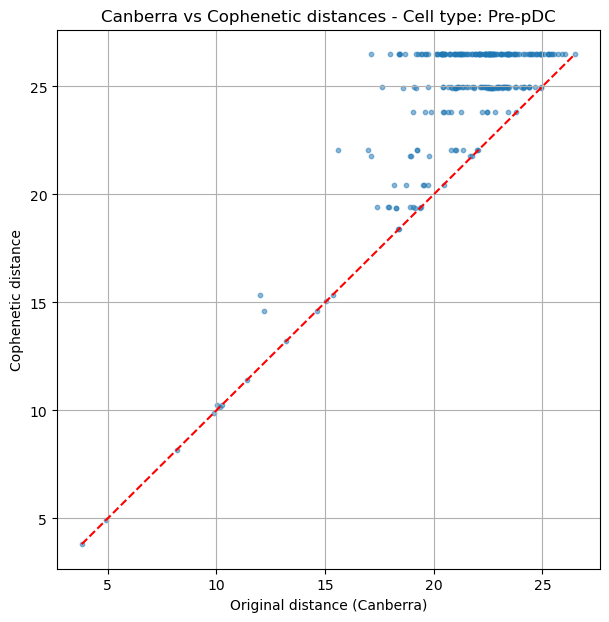

Distance comparison for cell type: ProMono
CPCC: 0.880


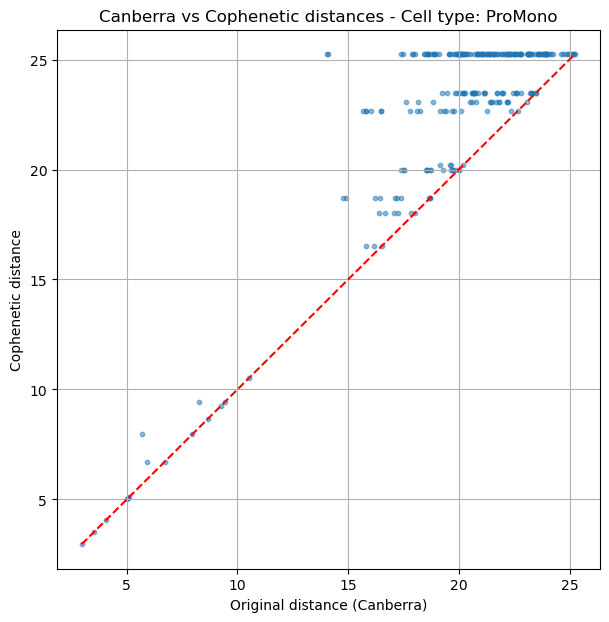

Distance comparison for cell type: Progenitor_Cycling
CPCC: 0.886


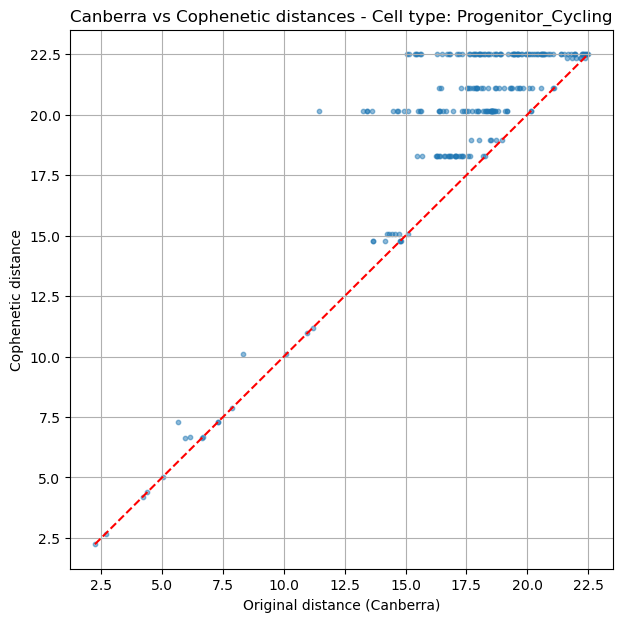

Distance comparison for cell type: T cell
CPCC: 0.819


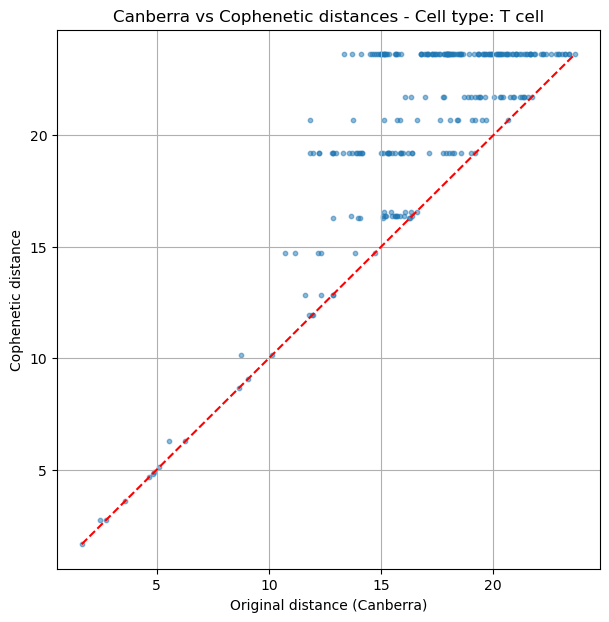

Distance comparison for cell type: pDC
CPCC: 0.868


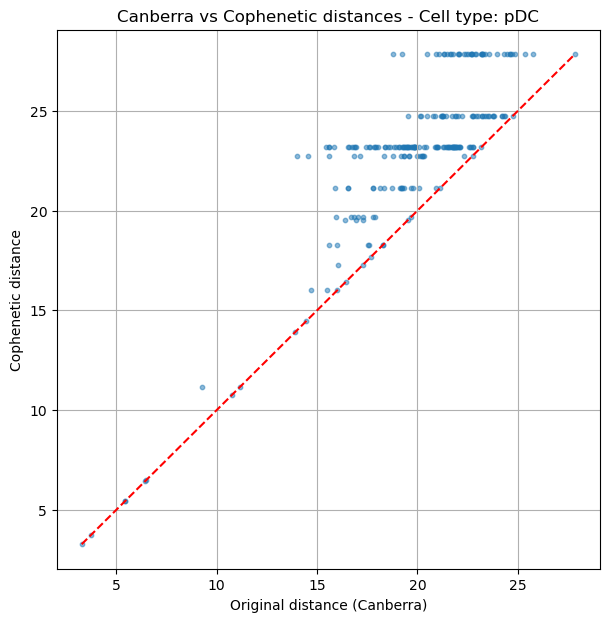

In [17]:
for celltype, data in subdatasets.items():
    print(f"Distance comparison for cell type: {celltype}")

    # Compute original Canberra distance (1D array)
    dist_orig = pdist(data, metric='canberra')

    # Perform hierarchical clustering using complete linkage + Canberra
    Z = linkage(data, method='complete', metric='canberra')

    # Compute cophenetic distance (1D array)
    coph_corr, dist_coph = cophenet(Z, dist_orig)

    print(f"CPCC: {coph_corr:.3f}")

    # Plot scatter: original distance vs cophenetic distance
    plt.figure(figsize=(7, 7))
    plt.scatter(dist_orig, dist_coph, s=10, alpha=0.5)
    plt.plot([dist_orig.min(), dist_orig.max()],
             [dist_orig.min(), dist_orig.max()],
             color='red', linestyle='--')
    plt.title(f"Canberra vs Cophenetic distances - Cell type: {celltype}")
    plt.xlabel("Original distance (Canberra)")
    plt.ylabel("Cophenetic distance")
    plt.grid(True)
    plt.show()

/var/folders/br/6b6r1b7j5hb79g8jd_lks8v00000gn/T/ipykernel_1358/3952441740.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', len(unique_clusters))


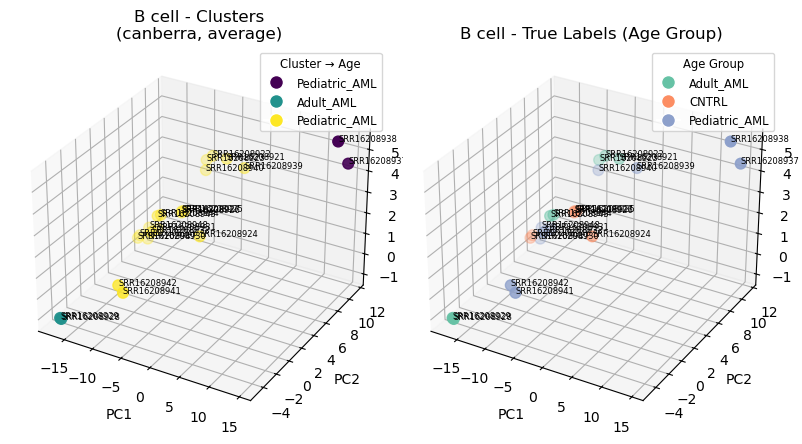

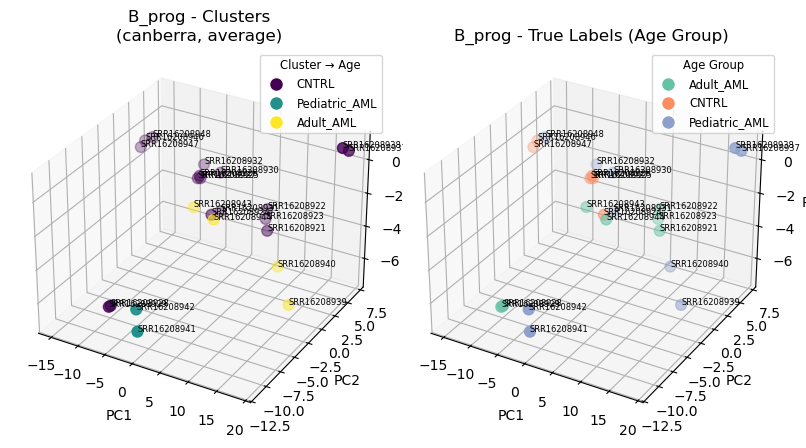

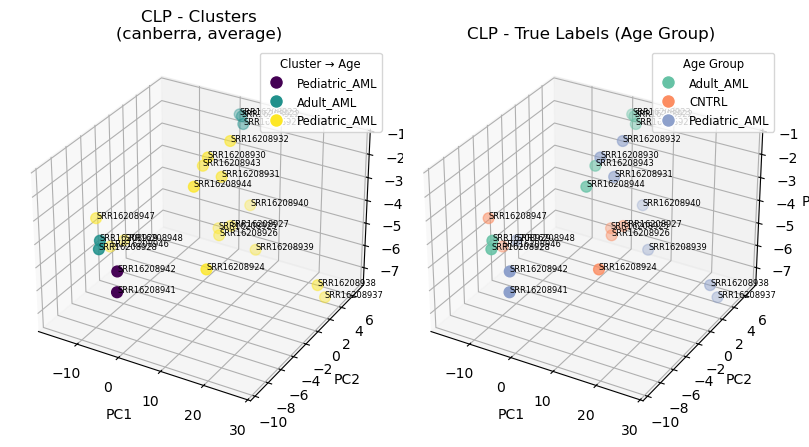

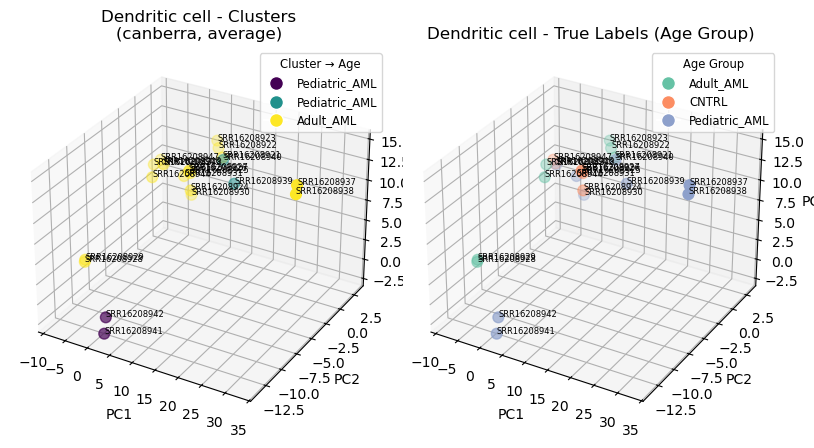

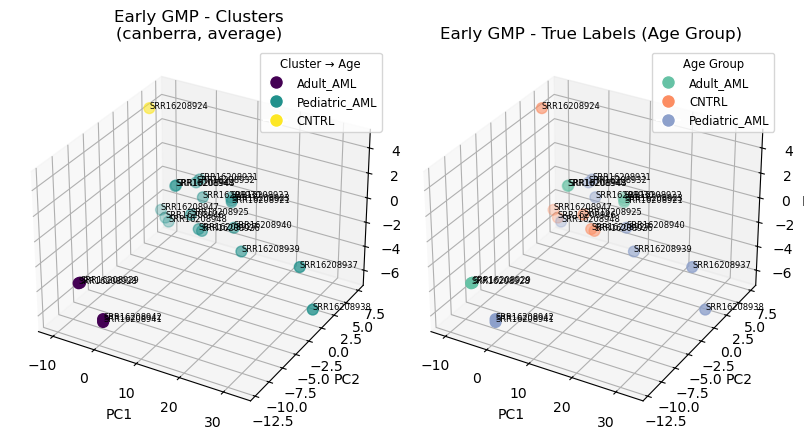

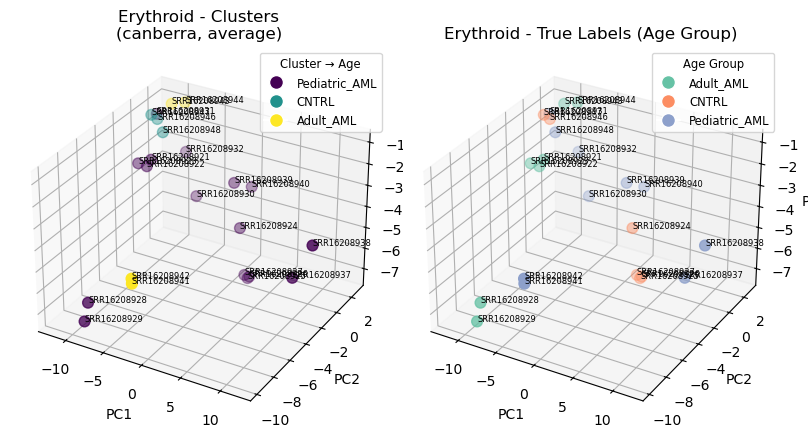

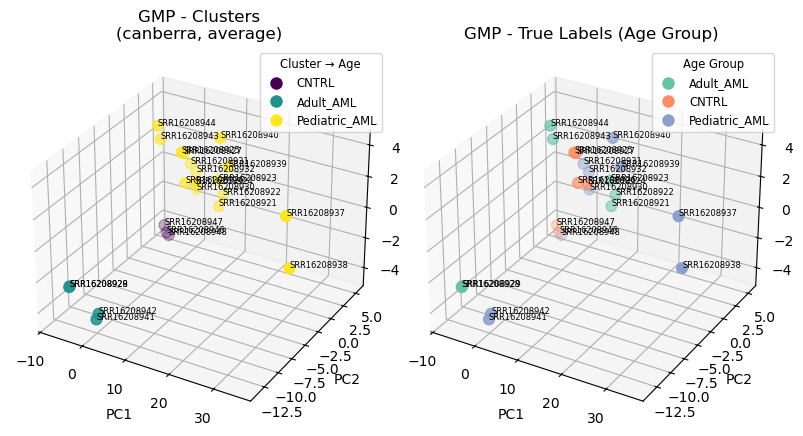

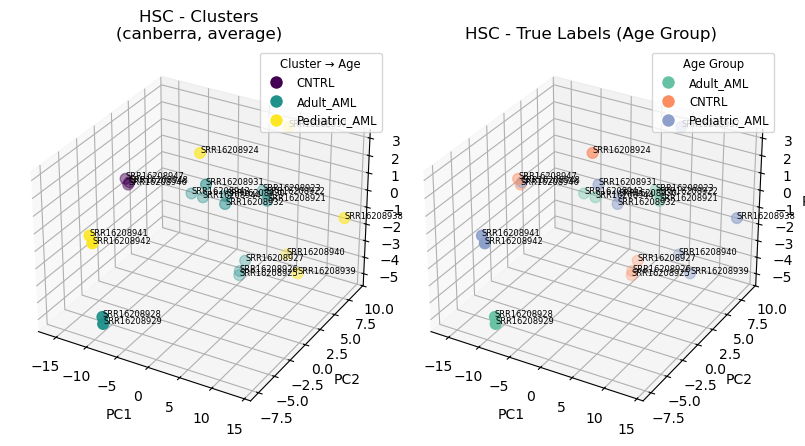

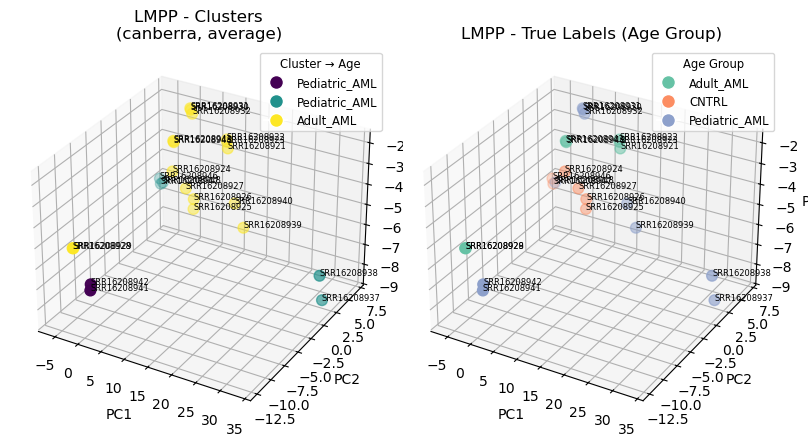

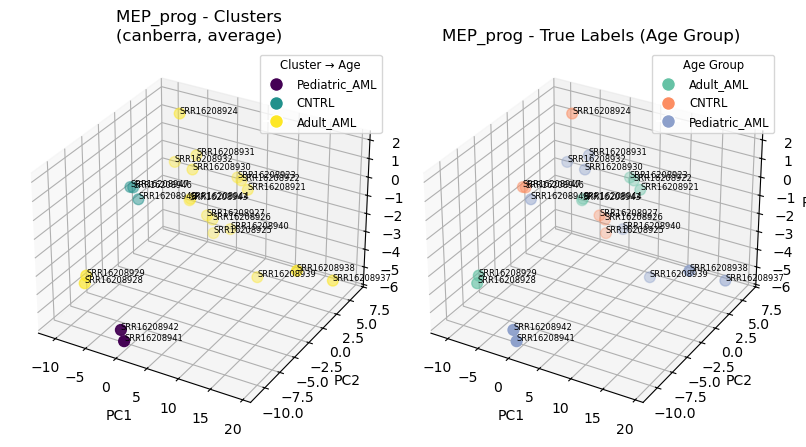

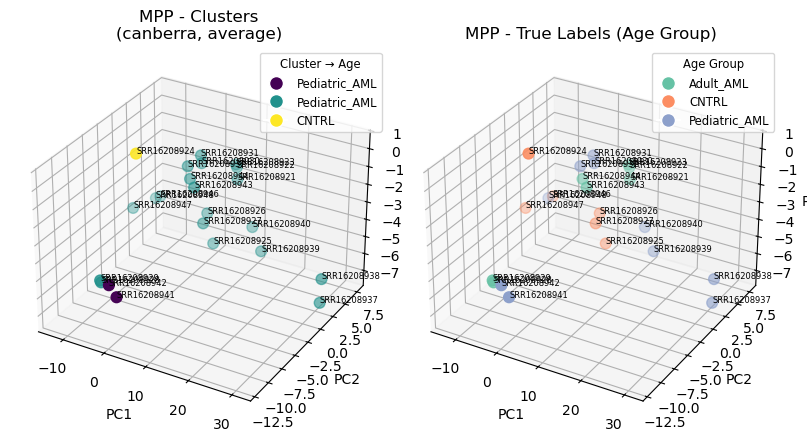

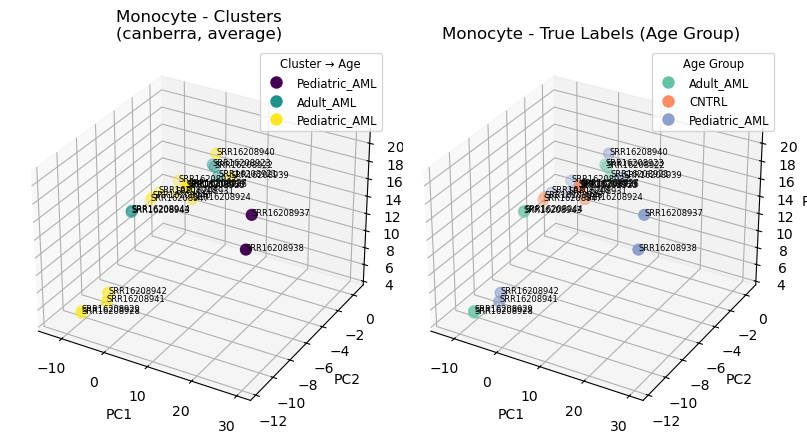

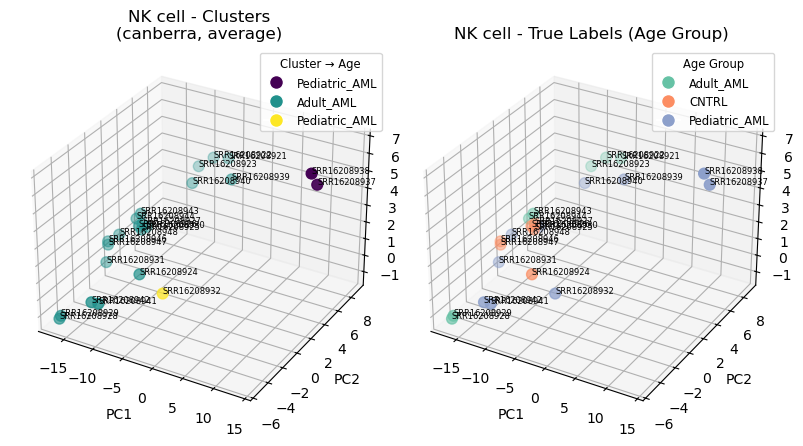

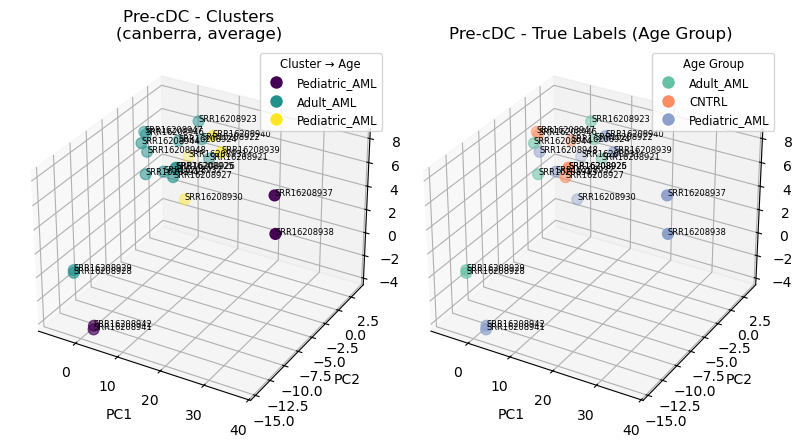

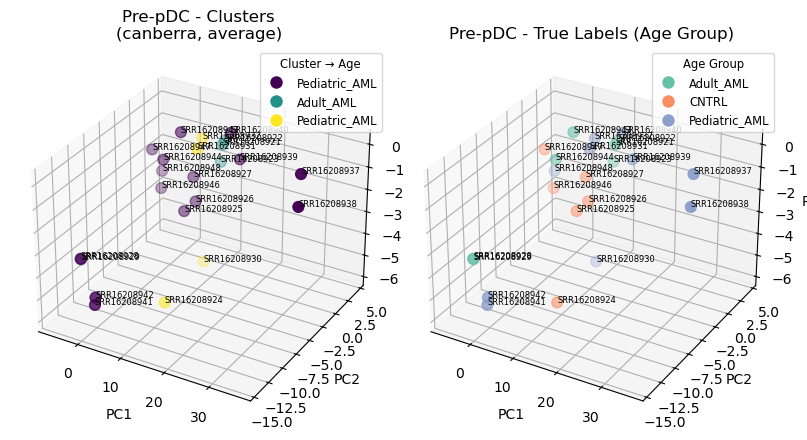

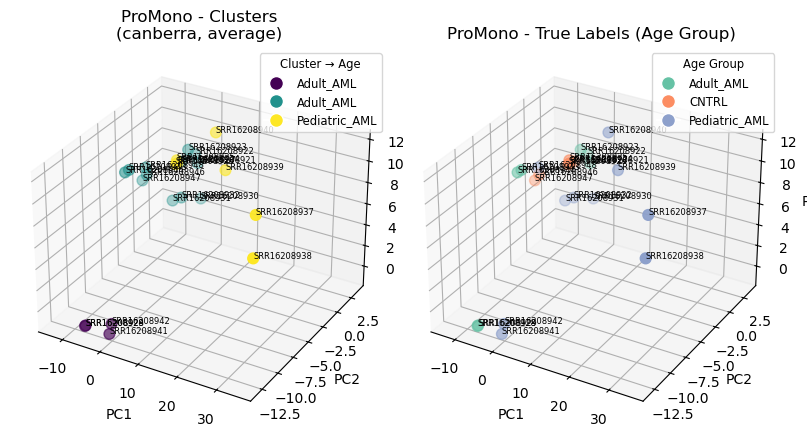

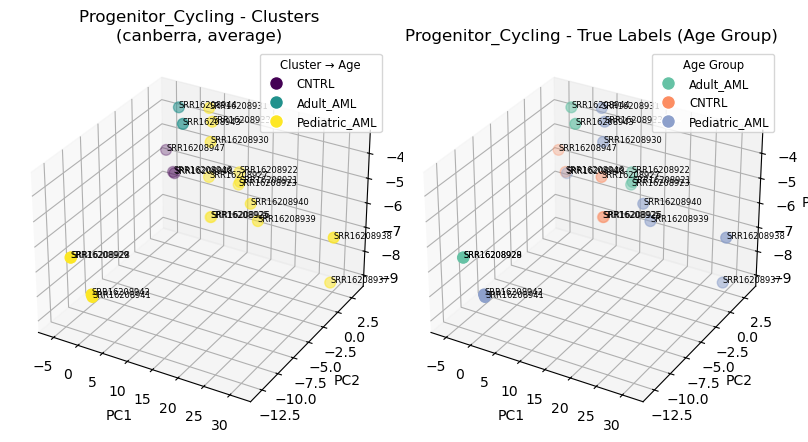

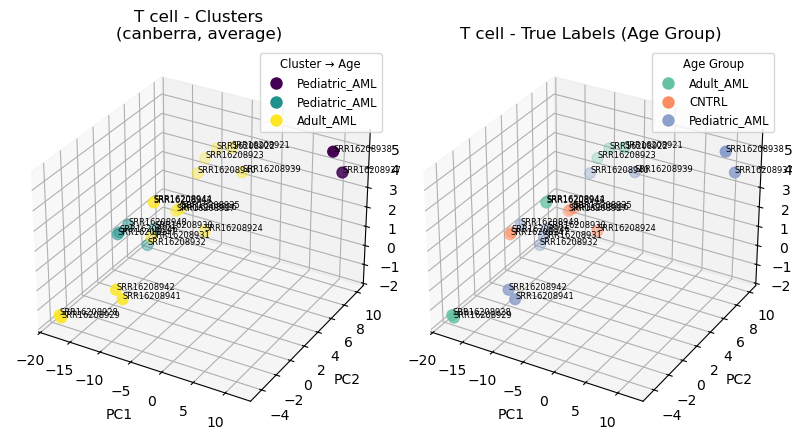

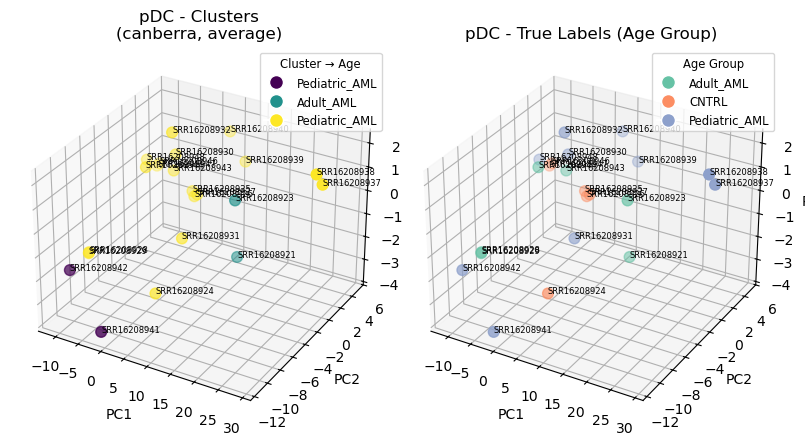

In [18]:
# Parameters
distance_metric = 'canberra'
linkage_method = 'average'

# List of cell types to analyze
celltypes = ['B cell', 'B_prog', 'CLP', 'Dendritic cell', 'Early GMP',
    'Erythroid', 'GMP', 'HSC', 'LMPP', 'MEP_prog',
    'MPP', 'Monocyte', 'NK cell', 'Pre-cDC', 'Pre-pDC',
    'ProMono', 'Progenitor_Cycling', 'T cell', 'pDC']  # <-- update with your actual cell types

# Dictionary to store results
results = {}

for celltype in celltypes:
    # Extract data for this cell type
    data = subdatasets[celltype]  # Make sure it's a numpy array
    subset_meta = pca_df[pca_df['cell_type'] == celltype]
    true_labels = subset_meta['age'].values

    # Hierarchical clustering
    Z = linkage(data, method=linkage_method, metric=distance_metric)
    cluster_labels = fcluster(Z, t=3, criterion='maxclust')

    # Map clusters to majority true labels
    cluster_to_label = map_clusters_to_labels(true_labels, cluster_labels)

    # Store results in the dictionary
    results[celltype] = {
        'data': data,
        'true_labels': true_labels,
        'cluster_labels': cluster_labels,
        'cluster_to_label': cluster_to_label,
        'pca_coordinates': data[:, :3],  # First three PCA components
        'Z_matrix': Z,  # Linkage matrix
    }

    # 3D coordinates (assuming at least 3 PCA components)
    x = data[:, 0]
    y = data[:, 1]
    z = data[:, 2]

    # Setup figure
    fig = plt.figure(figsize=(8, 5))

    # Cluster color mapping
    unique_clusters = np.unique(cluster_labels)
    cmap = plt.cm.get_cmap('viridis', len(unique_clusters))
    colors_cluster = [cmap(cluster - 1) for cluster in cluster_labels]

    # Plot clustering
    ax1 = fig.add_subplot(121, projection='3d')
    scatter1 = ax1.scatter(x, y, z, c=colors_cluster, s=60)
    for xi, yi, zi, pid in zip(x, y, z, subset_meta['patient_id']):
       ax1.text(xi, yi, zi, str(pid), fontsize=6, color='black')

    ax1.set_title(f'{celltype} - Clusters\n({distance_metric}, {linkage_method})')
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')

    # Legend for clusters mapped to age
    handles = []
    for cluster in sorted(cluster_to_label.keys()):
        color = cmap(cluster - 1)
        label = cluster_to_label[cluster]
        handles.append(plt.Line2D([0], [0], marker='o', color='w', label=label,
                                  markerfacecolor=color, markersize=10))
    ax1.legend(handles=handles, title='Cluster → Age', loc='upper right', fontsize='small', title_fontsize='small')

    # Plot true labels
    ax2 = fig.add_subplot(122, projection='3d')
    unique_true = np.unique(true_labels)
    palette = dict(zip(unique_true, sns.color_palette("Set2", len(unique_true))))
    colors_true = [palette[label] for label in true_labels]
    scatter2 = ax2.scatter(x, y, z, c=colors_true, s=60)
    for xi, yi, zi, pid in zip(x, y, z, subset_meta['patient_id']):
       ax2.text(xi, yi, zi, str(pid), fontsize=6, color='black')

    ax2.set_title(f'{celltype} - True Labels (Age Group)')
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')
    ax2.set_zlabel('PC3')

    # Legend for true age groups
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                          markerfacecolor=color, markersize=10)
               for label, color in palette.items()]
    ax2.legend(handles=handles, title='Age Group', loc='upper right', fontsize='small', title_fontsize='small')

    plt.tight_layout()
    plt.show()

## DB scan

In [20]:
# Function to map each cluster to the actual age group (based on a majority criterion)
def map_clusters_to_labels(true_labels, cluster_labels):
    labels = np.unique(cluster_labels)
    mapping = {}
    for label in labels:
        idx = cluster_labels == label
        majority = pd.Series(true_labels[idx]).mode().iloc[0]
        mapping[label] = majority
    return mapping

# DBSCAN parameters to compare (eps, min_samples)
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 15]  # we try different values for min_samples

# Loop on all the subdatasets (for each cell type)
for celltype, data in subdatasets.items():
    print(f"Results for {celltype}:")

    # Metadata
    subset_meta = pca_df[pca_df['cell_type'] == celltype]
    true_labels = subset_meta['age'].values

    # Variables to save the results
    best_accuracy = -1
    best_params = (None, None)  # it saves the best parameters (the ones used to achieve the best result)

    # Loop on DBSCAN  using different combinations of the parameters (eps, min_samples)
    for eps in eps_values:
        for min_samples in min_samples_values:
            # Apply DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='canberra')
            cluster_labels = dbscan.fit_predict(data)

            # Neglect clusters with a lot of noise (-1), i.e. the outliers
            cluster_labels = np.where(cluster_labels == -1, -1, cluster_labels)

            # Cluster mapping -> actual labels to compute accuracy
            cluster_to_label = map_clusters_to_labels(true_labels, cluster_labels)
            predicted_labels = [cluster_to_label[c] for c in cluster_labels]
            acc = accuracy_score(true_labels, predicted_labels)

            # Compare to get the best parameters for DBSCAN
            if acc > best_accuracy:
                best_accuracy = acc
                best_params = (eps, min_samples)

    # Only print the accuracy of the best method for each cell type
    print(f"  Best Params (eps, min_samples): {best_params}")
    print(f"  Best Accuracy: {best_accuracy:.3f}")
    print("-" * 60)

Results for B cell:
  Best Params (eps, min_samples): (0.3, 5)
  Best Accuracy: 0.435
------------------------------------------------------------
Results for B_prog:
  Best Params (eps, min_samples): (0.3, 5)
  Best Accuracy: 0.435
------------------------------------------------------------
Results for CLP:
  Best Params (eps, min_samples): (0.3, 5)
  Best Accuracy: 0.435
------------------------------------------------------------
Results for Dendritic cell:
  Best Params (eps, min_samples): (0.3, 5)
  Best Accuracy: 0.409
------------------------------------------------------------
Results for Early GMP:
  Best Params (eps, min_samples): (0.3, 5)
  Best Accuracy: 0.435
------------------------------------------------------------
Results for Erythroid:
  Best Params (eps, min_samples): (0.3, 5)
  Best Accuracy: 0.435
------------------------------------------------------------
Results for GMP:
  Best Params (eps, min_samples): (0.3, 5)
  Best Accuracy: 0.435
------------------------

## Multidimentional scaling

In [22]:
# Function to map each cluster to the actual label (based on a majority criterion)
def map_clusters_to_labels(true_labels, cluster_labels):
    labels = np.unique(cluster_labels)
    mapping = {}
    for label in labels:
        idx = cluster_labels == label
        majority = pd.Series(true_labels[idx]).mode().iloc[0]
        mapping[label] = majority
    return mapping

# Define DBSCAN parameters to compare (eps, min_samples)
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 15]

# Loop on each subdataset (for every cell type)
for celltype, data in subdatasets.items():
    print(f"Results for {celltype}:")

    # Metadata
    subset_meta = pca_df[pca_df['cell_type'] == celltype]
    true_labels = subset_meta['age'].values

    # Variables to save the results
    best_accuracy = -1
    best_params = (None, None)  # we save the best parameters

    # Apply MDS to reduce data dimensionality
    mds = MDS(n_components=2, random_state=42)  # we reduce to n = 2 to visualize
    data_mds = mds.fit_transform(data)

    # Loop on DBSCAN parameters (eps, min_samples)
    for eps in eps_values:
        for min_samples in min_samples_values:
            # Apply di DBSCAN on the reduced data with mds
            dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='canberra')
            cluster_labels = dbscan.fit_predict(data_mds)

            # # Neglect clusters with a lot of noise (-1), i.e. the outliers
            cluster_labels = np.where(cluster_labels == -1, -1, cluster_labels)

            # Cluster mapping -> actual labels to compute accuracy
            cluster_to_label = map_clusters_to_labels(true_labels, cluster_labels)
            predicted_labels = [cluster_to_label[c] for c in cluster_labels]
            acc = accuracy_score(true_labels, predicted_labels)

            # Compare to get the best parameters for DBSCAN
            if acc > best_accuracy:
                best_accuracy = acc
                best_params = (eps, min_samples)

    # Only print the accuracy of the best method for each cell type
    print(f"  Best Params (eps, min_samples): {best_params}")
    print(f"  Best Accuracy: {best_accuracy:.3f}")
    print("-" * 60)

Results for B cell:
  Best Params (eps, min_samples): (0.3, 5)
  Best Accuracy: 0.435
------------------------------------------------------------
Results for B_prog:
  Best Params (eps, min_samples): (0.5, 5)
  Best Accuracy: 0.478
------------------------------------------------------------
Results for CLP:
  Best Params (eps, min_samples): (0.5, 5)
  Best Accuracy: 0.478
------------------------------------------------------------
Results for Dendritic cell:
  Best Params (eps, min_samples): (0.7, 5)
  Best Accuracy: 0.545
------------------------------------------------------------
Results for Early GMP:
  Best Params (eps, min_samples): (0.7, 5)
  Best Accuracy: 0.522
------------------------------------------------------------
Results for Erythroid:
  Best Params (eps, min_samples): (0.3, 5)
  Best Accuracy: 0.435
------------------------------------------------------------
Results for GMP:
  Best Params (eps, min_samples): (0.3, 5)
  Best Accuracy: 0.435
------------------------

## Aggregation of the results

In [30]:
def map_clusters_to_labels(true_labels, cluster_labels):
    labels = np.unique(cluster_labels)
    mapping = {}
    for label in labels:
        idx = cluster_labels == label
        majority = pd.Series(true_labels[idx]).mode().iloc[0]
        mapping[label] = majority
    return mapping

# Select all PCA columns
pca_columns = [col for col in pca_df.columns if col.startswith('PC')]

# Create subdatasets for each cell type with only PCA columns
subdatasets = {}
for celltype, group_df in pca_df.groupby('cell_type'):
    subdatasets[celltype] = group_df[pca_columns].values

linkage_method = 'complete'
distance_metric = 'canberra'

results = []  # accumulate cluster DataFrames for each patient/cell type

for celltype, data in subdatasets.items():
    subset_meta = pca_df[pca_df['cell_type'] == celltype].copy()
    true_labels = subset_meta['age'].values

    try:
        Z = linkage(data, method=linkage_method, metric=distance_metric)
        cluster_labels = fcluster(Z, t=3, criterion='maxclust') - 1  # clusters 0,1,2

        cluster_to_label = map_clusters_to_labels(true_labels, cluster_labels)
        predicted_labels = [cluster_to_label[c] for c in cluster_labels]

        # Add cluster labels to the dataframe for each patient/cell type
        subset_meta['cluster'] = cluster_labels

        # Save only patient_id, cell_type, and cluster columns for this cell type
        partial_df = subset_meta[['patient_id', 'cell_type', 'cluster']].copy()
        results.append(partial_df)

    except Exception as e:
        print(f"Warning: clustering failed for {celltype}: {e}")

# Concatenate all results into a single DataFrame with structure patient_id, cell_type, cluster
result_df = pd.concat(results, ignore_index=True)

In [31]:
import pandas as pd
pivot_df = result_df.pivot(index='patient_id', columns='cell_type', values='cluster')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(pivot_df)

cell_type    B cell  B_prog  CLP  Dendritic cell  Early GMP  Erythroid  GMP  \
patient_id                                                                    
SRR16208921     2.0     1.0  2.0             2.0        0.0        1.0  0.0   
SRR16208922     2.0     1.0  2.0             2.0        0.0        1.0  0.0   
SRR16208923     2.0     1.0  2.0             2.0        0.0        1.0  0.0   
SRR16208924     2.0     0.0  0.0             2.0        2.0        2.0  0.0   
SRR16208925     2.0     0.0  0.0             2.0        0.0        2.0  0.0   
SRR16208926     2.0     0.0  0.0             2.0        0.0        2.0  0.0   
SRR16208927     2.0     0.0  0.0             2.0        0.0        2.0  0.0   
SRR16208928     0.0     1.0  0.0             2.0        1.0        2.0  1.0   
SRR16208929     0.0     1.0  0.0             2.0        1.0        2.0  1.0   
SRR16208930     0.0     0.0  1.0             2.0        0.0        2.0  2.0   
SRR16208931     0.0     0.0  1.0             2.0    

In [32]:
exclude_cols = ['cluster_group', 'cluster']
cell_types = pivot_df.columns.difference(exclude_cols)

adj_matrices = {}

for cell in cell_types:
    values = pivot_df[cell].values.reshape(-1, 1)
    # compare all values: True if equal, False if different
    adj_matrix = (values == values.T).astype(int)
    adj_matrices[cell] = pd.DataFrame(adj_matrix, index=pivot_df.index, columns=pivot_df.index)

# Display an example for 'B cell'
print(adj_matrices['B cell'])

patient_id   SRR16208921  SRR16208922  SRR16208923  SRR16208924  SRR16208925  \
patient_id                                                                     
SRR16208921            1            1            1            1            1   
SRR16208922            1            1            1            1            1   
SRR16208923            1            1            1            1            1   
SRR16208924            1            1            1            1            1   
SRR16208925            1            1            1            1            1   
SRR16208926            1            1            1            1            1   
SRR16208927            1            1            1            1            1   
SRR16208928            0            0            0            0            0   
SRR16208929            0            0            0            0            0   
SRR16208930            0            0            0            0            0   
SRR16208931            0            0   

In [33]:
# Biology derived weights
cell_weights= {'Early GMP': 3, 'GMP': 3, 'LMPP': 3, 'MEP_prog': 3, 'MPP': 3, 'ProMono': 3,
    'Monocyte': 2, 'Pre-cDC': 2, 'Pre-pDC': 2,
    'B cell': 1, 'B_prog': 1, 'CLP': 1, 'Dendritic cell': 1,
    'Erythroid': 1, 'HSC': 1,
    'NK cell': 1,
    'Progenitor_Cycling': 1, 'T cell': 1, 'pDC': 1
}

# Initialize a zero matrix
sum_matrix = np.zeros(adj_matrices[cell_types[0]].shape, dtype=float)

# Weighted sum of the matrices
for cell in cell_types:
    weight = cell_weights.get(cell, 1.0)
    sum_matrix += weight * adj_matrices[cell].values

# Convert to dataframe
sum_df = pd.DataFrame(sum_matrix, index=pivot_df.index, columns=pivot_df.index)

print(sum_df)

patient_id   SRR16208921  SRR16208922  SRR16208923  SRR16208924  SRR16208925  \
patient_id                                                                     
SRR16208921         34.0         33.0         34.0         15.0         20.0   
SRR16208922         33.0         33.0         33.0         15.0         20.0   
SRR16208923         34.0         33.0         34.0         15.0         20.0   
SRR16208924         15.0         15.0         15.0         33.0         20.0   
SRR16208925         20.0         20.0         20.0         20.0         34.0   
SRR16208926         20.0         20.0         20.0         20.0         34.0   
SRR16208927         20.0         20.0         20.0         20.0         34.0   
SRR16208928         18.0         18.0         18.0         10.0         15.0   
SRR16208929         18.0         18.0         18.0         10.0         15.0   
SRR16208930         16.0         16.0         16.0         10.0         15.0   
SRR16208931         18.0         18.0   

In [35]:
# Normalize sum_df between 0 and 1
sum_df_norm = (sum_df - sum_df.min().min()) / (sum_df.max().max() - sum_df.min().min())

# Build dissimilarity matrix
dissimilarity_matrix = 1 - sum_df_norm

# Set diagonal to 0
np.fill_diagonal(dissimilarity_matrix.values, 0)

# Convert to condensed form
condensed_dissimilarity = squareform(dissimilarity_matrix)

# Clustering
Z = linkage(condensed_dissimilarity, method='average')
clusters = fcluster(Z, 3, criterion='maxclust')

# Convert clusters from 1,2,3 to 0,1,2
clusters = clusters - 1

# Assume the order of sum_df and dissimilarity_matrix rows matches patient order
patient_ids = sum_df.index.to_list()

# Create DataFrame with clustering results
cluster_df = pd.DataFrame({
    'patient_id': patient_ids,
    'cluster': clusters
})

# Get true labels 'age' from pca_df, one per patient
true_labels_df = pca_df[['patient_id', 'age']].drop_duplicates(subset='patient_id')

# Merge clusters with true labels via patient_id
result_df = cluster_df.merge(true_labels_df, on='patient_id', how='left')

print(result_df)

     patient_id  cluster            age
0   SRR16208921        2      Adult_AML
1   SRR16208922        2      Adult_AML
2   SRR16208923        2      Adult_AML
3   SRR16208924        2          CNTRL
4   SRR16208925        2          CNTRL
5   SRR16208926        2          CNTRL
6   SRR16208927        2          CNTRL
7   SRR16208928        2      Adult_AML
8   SRR16208929        2      Adult_AML
9   SRR16208930        2  Pediatric_AML
10  SRR16208931        2  Pediatric_AML
11  SRR16208932        2  Pediatric_AML
12  SRR16208937        1  Pediatric_AML
13  SRR16208938        1  Pediatric_AML
14  SRR16208939        2  Pediatric_AML
15  SRR16208940        2  Pediatric_AML
16  SRR16208941        0  Pediatric_AML
17  SRR16208942        0  Pediatric_AML
18  SRR16208943        2      Adult_AML
19  SRR16208944        2      Adult_AML
20  SRR16208946        1          CNTRL
21  SRR16208947        1          CNTRL
22  SRR16208948        1  Pediatric_AML


In [36]:
# Get the true labels
true_labels = result_df['age'].values
# Get the cluster labels (0, 1, 2)
cluster_labels = result_df['cluster'].values

# List of unique true labels (in arbitrary order)
unique_true_labels = result_df['age'].unique()

# Generate all possible permutations of true labels to assign to clusters
best_accuracy = 0
best_mapping = None
best_predicted_labels = None

for perm in permutations(unique_true_labels):
    # Create mapping from cluster to label based on current permutation
    mapping = {cluster: label for cluster, label in zip([0, 1, 2], perm)}

    # Apply the mapping to predicted clusters
    predicted_labels = [mapping[cluster] for cluster in cluster_labels]

    # Calculate accuracy
    acc = accuracy_score(true_labels, predicted_labels)

    if acc > best_accuracy:
        best_accuracy = acc
        best_mapping = mapping
        best_predicted_labels = predicted_labels

print("Best mapping (cluster -> label):")
print(best_mapping)
print(f"Best accuracy: {best_accuracy:.3f}")

Best mapping (cluster -> label):
{0: 'Pediatric_AML', 1: 'CNTRL', 2: 'Adult_AML'}
Best accuracy: 0.478


[0 0 0 2 2 2 2 0 0 1 1 1 1 1 2 2 2 2 0 0 1 1 1]


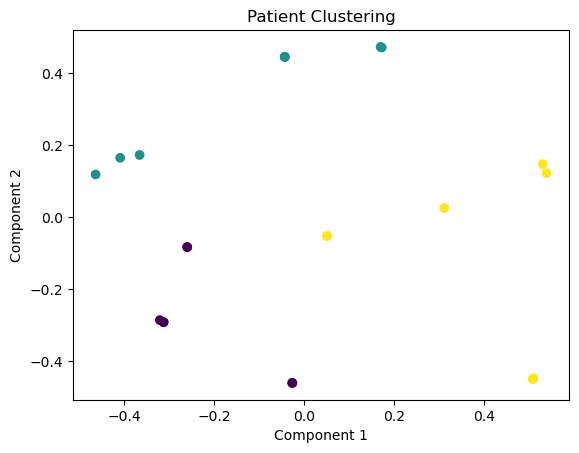

     patient_id  cluster            age
0   SRR16208921        0      Adult_AML
1   SRR16208922        0      Adult_AML
2   SRR16208923        0      Adult_AML
3   SRR16208924        2          CNTRL
4   SRR16208925        2          CNTRL
5   SRR16208926        2          CNTRL
6   SRR16208927        2          CNTRL
7   SRR16208928        0      Adult_AML
8   SRR16208929        0      Adult_AML
9   SRR16208930        1  Pediatric_AML
10  SRR16208931        1  Pediatric_AML
11  SRR16208932        1  Pediatric_AML
12  SRR16208937        1  Pediatric_AML
13  SRR16208938        1  Pediatric_AML
14  SRR16208939        2  Pediatric_AML
15  SRR16208940        2  Pediatric_AML
16  SRR16208941        2  Pediatric_AML
17  SRR16208942        2  Pediatric_AML
18  SRR16208943        0      Adult_AML
19  SRR16208944        0      Adult_AML
20  SRR16208946        1          CNTRL
21  SRR16208947        1          CNTRL
22  SRR16208948        1  Pediatric_AML


In [37]:
# Try a second method, which reveals to be much better
# It uses MDS and KMeans

# Normalize sum_df between 0 and 1
sum_df_norm = (sum_df - sum_df.min().min()) / (sum_df.max().max() - sum_df.min().min())

# Build dissimilarity matrix
dissimilarity_matrix = 1 - sum_df_norm

# Set diagonal to 0
np.fill_diagonal(dissimilarity_matrix.values, 0)

# 1. Apply MDS to reduce the dissimilarity matrix to Euclidean coordinates
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coordinates = mds.fit_transform(dissimilarity_matrix)

# 2. Apply K-means clustering with 3 clusters on the obtained coordinates
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(coordinates)

# 3. Print cluster assignments
print(clusters)  # Array with cluster assignment for each patient (0,1,2)

# If you want, you can also visualize the clusters
import matplotlib.pyplot as plt

plt.scatter(coordinates[:,0], coordinates[:,1], c=clusters, cmap='viridis')
plt.title("Patient Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

# List of patients used for clustering (correct order)
patient_ids = sum_df.index.to_list()

# Get unique labels per patient from pca_df
true_labels_df = pca_df[['patient_id', 'age']].drop_duplicates(subset='patient_id')

# Sort true_labels_df to align with patient_ids
true_labels_df = true_labels_df.set_index('patient_id').loc[patient_ids].reset_index()

# Now create the dataframe with cluster and labels
results_df = pd.DataFrame({
    'patient_id': patient_ids,
    'cluster': clusters,
    'age': true_labels_df['age'].values
})

print(results_df)

In [43]:
# Get the true labels
true_labels = results_df['age'].values
# Get the cluster labels (0, 1, 2)
cluster_labels = results_df['cluster'].values

# List of unique true labels (in arbitrary order)
unique_true_labels = results_df['age'].unique()

# Generate all possible permutations of true labels to assign to clusters
best_accuracy = 0
best_mapping = None
best_predicted_labels = None

for perm in permutations(unique_true_labels):
    # Create mapping from cluster to label based on the current permutation
    mapping = {cluster: label for cluster, label in zip([0, 1, 2], perm)}

    # Apply the mapping to predicted clusters
    predicted_labels = [mapping[cluster] for cluster in cluster_labels]

    # Calculate accuracy
    acc = accuracy_score(true_labels, predicted_labels)

    if acc > best_accuracy:
        best_accuracy = acc
        best_mapping = mapping
        best_predicted_labels = predicted_labels

# Print results
print("Best mapping (cluster -> label):")
print(best_mapping)
print(f"Best accuracy: {best_accuracy:.3f}")

# Add column with corrected predictions to the DataFrame
results_df['predicted_age'] = best_predicted_labels

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, best_predicted_labels, labels=unique_true_labels)
print("\nConfusion Matrix:")
print(pd.DataFrame(conf_matrix, index=[f"True_{l}" for l in unique_true_labels],
                                     columns=[f"Pred_{l}" for l in unique_true_labels]))

# Misclassified patients
misclassified = results_df[results_df['age'] != results_df['predicted_age']]
print(f"\nNumber of misclassified patients: {len(misclassified)}")
print("Misclassified patients:")
print(misclassified[['age', 'cluster', 'predicted_age']])

print(misclassified[['patient_id', 'age', 'cluster', 'predicted_age']])

Best mapping (cluster -> label):
{0: 'Adult_AML', 1: 'Pediatric_AML', 2: 'CNTRL'}
Best accuracy: 0.739

Confusion Matrix:
                    Pred_Adult_AML  Pred_CNTRL  Pred_Pediatric_AML
True_Adult_AML                   7           0                   0
True_CNTRL                       0           4                   2
True_Pediatric_AML               0           4                   6

Number of misclassified patients: 6
Misclassified patients:
              age  cluster  predicted_age
14  Pediatric_AML        2          CNTRL
15  Pediatric_AML        2          CNTRL
16  Pediatric_AML        2          CNTRL
17  Pediatric_AML        2          CNTRL
20          CNTRL        1  Pediatric_AML
21          CNTRL        1  Pediatric_AML
     patient_id            age  cluster  predicted_age
14  SRR16208939  Pediatric_AML        2          CNTRL
15  SRR16208940  Pediatric_AML        2          CNTRL
16  SRR16208941  Pediatric_AML        2          CNTRL
17  SRR16208942  Pediatric_AML     